<table class="table table-bordered">
    <tr>
        <th style="width:250px;">
            <img src='https://bcgriseacademy.com/hs-fs/hubfs/rise2.0_black_logo.png' style="background-color:white; width: 100%; height: 100%; padding: 20px">
        </th>
        <th style="text-align:center;">
            <h1>Feature Engineering and Selection</h1>
            <h3>IBF TFIP</h3>
        </th>
    </tr>
</table>

<a name="0.1"></a>   
## Learning Objectives

* The chapter details out the important steps in feature engineering in sequential manner with what, why, when and how behind everything
* It is a launchpad for further deep dive into feature engineering
* The lesson covers:
    * Introduction to key concepts and algorithms for feature engineering and selection
    * Application of those concepts and algorithm at a code level

# Table of Contents
- [1     Feature Engineering](#1)
    - [1.1   What is feature engineering and why is it important?](#1.1)
    - [1.2   Basic overview on the different steps in feature engineering](#1.2)
    - [1.3   Understanding the problem and data](#1.3)
    - [1.4   Feature Transformation Overview](#1.4)
    - [1.5   Feature Transformation - Numerical Features](#1.5)
        - [1.5.1   Feature Transformation Techniques](#1.5.1)
        - [1.5.2   Feature Scaling](#1.5.2)
        - [1.5.3   Which Algorithms Require Scaling?](#1.5.3)
        - [1.5.4   Scaling and Train-Test Split](#1.5.4)
    - [1.6   Feature Transformation - Categorical Features](#1.6)
        - [1.6.1   Dummy encoding (aka One-Hot Encoding)](#1.6.1)
        - [1.6.2   Ordinal encoding](#1.6.2)
        - [1.6.3   Other encoding methods](#1.6.3)
        - [1.6.4   Recoding](#1.6.4)
        - [1.6.5   Interaction Terms](#1.6.5)
    - [1.7   Feature Transformation - Date/Time Features](#1.7)
    - [1.8   Feature Construction (aka Feature Synthesis)](#1.8)
    - [1.9   Handling Missing Values](#1.9)
    - [1.10  Case Example - Personalization for an Airline](#1.10)
- [2   Feature Selection](#2)
    - [2.1   Unsupervised Feature Selection](#2.1)
    - [2.2   Supervised Feature Selection](#2.2)
        - [2.2.1   Filter Methods](#2.2.1)    
        - [2.2.2   Wrapper Methods](#2.2.2)  
        - [2.2.3   Embedded Methods](#2.2.3)  
    - [2.3   Dimensionality Reduction](#2.3)          
        - [2.3.1   Principal Component Analysis (PCA)](#2.3.1)    

___
<a name="1"></a>   
# 1. Feature Engineering Introduction

<a name="1.1"></a>   
## 1.1 What is feature engineering and why is it important?

> *Coming up with features is difficult, time-consuming, and requires expert knowledge. 'Applied machine learning' is basically feature engineering.*  
 -- Andrew Ng, Machine Learning and AI via Brain Simulations

> *No algorithm alone, to my knowledge, can supplement the information gain 
given by correct feature engineering*  
-- Luca Massaron (blog post on winning Kaggle competitions)

- Model performance is heavily dependent on having relevant, useful predictors with good predictor-response relationships 
- The idea that there are different ways to represent predictors in a model, and that some of these representations are better than others, leads to the idea of feature engineering—the process of creating representations of data that increase the effectiveness of a model.
- Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. 
- It is the greatest immediate source of predictive power under your control. Understanding how new features can be constructed forms a large part of the art of data science.
- Feature engineering answers this question: what is the best representation of the sample data to learn a solution to your problem?
- __What__: Feature engineering is critical in capturing the important information that will be used as input to your model
- __Why__: Good feature engineering can significantly improve the accuracy and training time of the model
- Feature engineering is more like an art, requiring the right tools and experience to find better predictor representations



<a name="1.2"></a>   
## 1.2 Basic overview on the different steps in feature engineering:

Below is the basic overview of the feature engineering concepts covered in this lesson 

1. __Feature Engineering__: This section explores the intuition behind feature engineering, including the common techniques used for different data types. It also explores the different techniques to construct more features and modify existing feature to make them suitable for modeling


2. __Feature Selection__: This section explores how to select a smaller subset of ideal features for modeling. The goal is to improve model performance while reducing the computational costs.

### A primer example of possible feature engineering steps:
1. Removing commas, converting the brackets to corresponding negative values, and changing the data type from string to numeric would help build an input set that can be processed by machine learning easily  
2. Performing aggregations often helped result in intuitive summary values that provided more insight  
3. Joining the different data tables helped establish a single data source for all entities  
4. Finding the ratios helped with comparison

### Best Practices
- It is recommended to do feature engineering step by step by first collecting some of the data, build some features, and then test it in a predictive model. 
- This is part of a hypothesis-based approach. From there, we iteratively get more data or do more feature engineering to improve the model.
- It is opposed to boiling the ocean and trying to come up with all the features possible at once. 
- As part of agile, break down potential features into categories and prioritize them based on potential predictive power, instead of lumping them all together to work on
- Domain knowledge is a vital component of feature engineering, so it is important to work closely with the business while gaining a strong understanding of the context and data.

___
<a name="1.3"></a>   
## 1.3 Understanding the problem and data

__Problem statement__: Use the New York energy data to build a model that can predict the Energy Star Score of a building and interpret the results to find the factors which influence the score.

1. Data is publicly available [here](http://www.nyc.gov/html/gbee/html/plan/ll84_scores.shtml)
2. Data dictionary [here](http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf)

A 1-to-100 percentile ranking based on self-reported energy usage for the reporting year. The [Energy Star score](https://www.energystar.gov/buildings/facility-owners-and-managers/existing-buildings/use-portfolio-manager/interpret-your-results/what) is a relative measure used for comparing the energy efficiency of buildings.

**Additional dataset** To understand some aspects of the feature engineering process, we will generate our own dataset. This dataset will be set up for a regression problem with 3 features, of which only 2 features would actually relate to the output. 

#### Import library in Notebook

First we need to import all the libraries at once that we are going to use in this excercise.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#taking care of warnings
import warnings
warnings.filterwarnings("ignore")

# For encoding
from sklearn.preprocessing import OrdinalEncoder

#for chi square test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

#for ANOVA test
import statsmodels.api as sm
from statsmodels.formula.api import ols

#for PCA
from sklearn.decomposition import PCA

# For Feature Selection
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

# Additional dataset
from sklearn.datasets import make_regression

In [2]:
# install feature_engine library only once
!pip install feature_engine

Defaulting to user installation because normal site-packages is not writeable


#### Setting Parameters for notebook


There are certain parameters which need to be set to a certain value.

In [3]:
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Inline graphs
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 12

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Font size for seaborn
sns.set(font_scale = 2)

#### Load data in Notebook

Load the New York energy data as pandas dataframe ([pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html))

In [4]:
data = pd.read_csv("Data/EnergyWaterCleanData.csv")

We will also generate any additional dummy data set to better understand feature selection.

In [5]:
X, y, coef = make_regression(n_samples = 100, # Total number of samples
                             n_features = 3, # Total number of features
                             n_informative = 2, # Number of features that relate 
                                                # to the output
                             coef = True, # Returns the coefficients used to
                                          # build the output from the inputs
                             random_state = 42) # To make sure we get the same
                                                # dataset each time
                             

We can examine the coefficients to see which two of the three features actually relate to the output:

In [6]:
print(coef)

[ 0.         28.20345726 17.74395438]


The second and third features are important for determining the output while the first feature has no influence on the output.

$$ y = 28.2x_2 + 17.7x_3$$
    
where the features are $x_1$, $x_2$, and $x_3$

From this point forward, the `data` variable is used to refer to the NY dataset while `X` and `y` refer to the dummy regression dataset.

#### View the data

In [7]:
#view only a subset of data using head function
data.head()
#data.tail()

,Unnamed: 0,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,12,15,2637863,Cadman Towers,2637863,Cadman Towers,3002320001;3002380035,3002320001;3002380035,3001727;3319420,101 Clark St,11201,NaN,NaN,NaN,NaN,Multifamily Housing,"Multifamily Housing, Other, Parking",Multifamily Housing,412503.0,1903,2,100,Whole Building,Whole Building,93.0,32.0,NaN,7.5,0.0,NaN,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.0,51.01,87.9,04/28/2017 04:07:55 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
1,18,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,10040,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,1939,2,100,Whole Building,Whole Building,72.0,76.2,79.9,3.5,0.0,106.2,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.6,18.40,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
2,19,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,1939,1,100,Whole Building,NaN,67.0,75.7,79.0,4.0,0.0,109.1,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,NaN,NaN,106.6,05/01/2017 10:09:31 PM,NaN,In Compliance,40.857943,-73.934962,12.0,10.0,281.0,Washington Heights North ...
3,20,23,4988569,- 730 Ft. Washington Ave bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800628,1021800628,1064476;1803806,720-730 Ft. Washington Ave.,10040,730,FT WASHINGTON AVENUE,Manhattan,102150.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,116744.0,1939,1,100,Whole Building,NaN,80.0,77.1,82.7,2.6,0.0,102.8,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,NaN,NaN,97.7,05/01/2017 10:09:31 PM,Yes,In Compliance,40.858256,-73.934734,12.0,10.0,281.0,Washington Heights North ...
4,21,24,2806486,Park 76th Street Inc.,2806486,Park 76th Street Inc.,1013900037;1013910034,1013900037;1013910034,1041702; 1041800,830-840 Park Avenue,10021,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,189766.0,1911,2,100,Whole Building,Whole Building,100.0,68.0,NaN,6.1,0.5,NaN,8786386.9,98264.5,4013954.9,1156269.9,847.5,475.0,372.5,189766.0,NaN,NaN,115.6,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN


#### Basic Information about data

We can use __info()__ to understand data types across Pandas dataframe.data.info()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8979 entries, 0 to 8978
Data columns (total 50 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Unnamed: 0                                                  8979 non-null   int64  
 1   Order                                                       8979 non-null   int64  
 2   Property Id                                                 8979 non-null   int64  
 3   Property Name                                               8979 non-null   object 
 4   Parent Property Id                                          8979 non-null   object 
 5   Parent Property Name                                        8979 non-null   object 
 6   BBL - 10 digits                                             8977 non-null   object 
 7   NYC Borough, Block and Lot (BBL) self-reported              8977 non-null   object 
 8 

#### Descriptive statisitcs

Generate descriptive statistics that summarize the central tendency, dispersion and shape of the various features present in the data. Using [describe()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

#### Generate descriptive statistics for continuous variables

In [9]:
data.describe(percentiles=np.linspace(0,1,11)).T  # Create 10 percentiles using numpy (np)

,count,mean,std,min,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,max
Unnamed: 0,8979.0,6.032799e+03,3.291832e+03,12.000000,12.000000,1.448000e+03,2.619600e+03,3.753400e+03,4.987600e+03,6.103000e+03,7.171800e+03,8.381600e+03,9.384400e+03,1.052720e+04,1.174500e+04,1.174500e+04
Order,8979.0,7.379031e+03,4.205930e+03,15.000000,15.000000,1.750600e+03,3.075600e+03,4.309200e+03,5.813200e+03,7.258000e+03,8.677400e+03,1.053560e+04,1.173540e+04,1.321020e+04,1.499300e+04,1.499300e+04
Property Id,8979.0,3.665669e+06,1.043572e+06,7365.000000,7365.000000,2.661816e+06,2.715863e+06,2.800839e+06,2.964677e+06,3.417089e+06,4.038132e+06,4.401303e+06,4.576121e+06,4.988913e+06,5.991312e+06,5.991312e+06
DOF Gross Floor Area,8942.0,1.631568e+05,3.031962e+05,50028.000000,50028.000000,5.535000e+04,6.153640e+04,6.796270e+04,7.717080e+04,9.037700e+04,1.088452e+05,1.350490e+05,1.818768e+05,3.158446e+05,1.354011e+07,1.354011e+07
Largest Property Use Type - Gross Floor Area (ft²),8979.0,1.572731e+05,2.885827e+05,16803.000000,16803.000000,5.600000e+04,6.253420e+04,6.977080e+04,7.807240e+04,9.027900e+04,1.073688e+05,1.320000e+05,1.761944e+05,2.932412e+05,1.421712e+07,1.421712e+07
Year Built,8979.0,1.947867e+03,2.967378e+01,1600.000000,1600.000000,1.916000e+03,1.925000e+03,1.928000e+03,1.931000e+03,1.940000e+03,1.953000e+03,1.962000e+03,1.970000e+03,1.999000e+03,2.019000e+03,2.019000e+03
Number of Buildings - Self-reported,8979.0,1.296247e+00,4.088789e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.550000e+02,1.550000e+02
Occupancy,8979.0,9.902885e+01,5.582883e+00,0.000000,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
score,8979.0,6.069262e+01,2.937625e+01,1.000000,1.000000,1.400000e+01,3.200000e+01,4.500000e+01,5.700000e+01,6.600000e+01,7.400000e+01,8.200000e+01,8.900000e+01,9.700000e+01,1.000000e+02,1.000000e+02
Site EUI (kBtu/ft²),8979.0,7.988569e+01,3.095056e+01,0.000000,0.000000,4.320000e+01,5.930000e+01,6.670000e+01,7.260000e+01,7.840000e+01,8.430000e+01,9.140000e+01,1.005000e+02,1.161000e+02,2.048000e+02,2.048000e+02


#### Generate descriptive statistics for categorical variables

In [10]:
data.describe(include = "O").T  # Include only objects (i.e. categoricals)

,count,unique,top,freq
Property Name,8979,8977,Club Quarters Hotel,2
Parent Property Id,8979,66,Not Applicable: Standalone Property,8812
Parent Property Name,8979,66,Not Applicable: Standalone Property,8812
BBL - 10 digits,8977,8923,4067920600,10
"NYC Borough, Block and Lot (BBL) self-reported",8977,8923,4-06792-0600,10
NYC Building Identification Number (BIN),8872,8833,4455438,10
Address 1 (self-reported),8979,8930,410 West 118th Street,9
Postal Code,8979,249,10022,219
Street Number,8937,3588,1,53
Street Name,8939,1780,BROADWAY,271


___
<a name="1.4"></a>  
## 1.4 Feature Transformation Overview

- Transformation refers to the replacement of a variable by the output of a function. 
- For instance, replacing a variable x by the square / cube root or logarithm x is a transformation. 
- In other words, transformation is a process that changes the distribution or relationship of a variable with others. 

-	There are various issues that are commonly encountered for features
  -	Be on vastly different scales.
  - Skewed distribution where a small proportion of samples are orders of magnitude larger than the majority of the data (i.e., skewness).
  - Contain a small number of extreme values.
  - Censored on the low and/or high end of the range
  - Have a complex relationship with the response and be truly predictive but cannot be adequately represented with a simple function or extracted by sophisticated models.
  - Contain relevant and overly redundant information. That is, the information collected could be more effectively and efficiently represented with a smaller, consolidated number of new predictors while still preserving or enhancing the new predictors’ relationships with the response.
- Feature transformation is used to the tackle the above issues. 
- The techniques can be broadly classified into 3 goals:
  -	Address problematic characteristics of individual predictors
  -	Expand individual predictors into many predictors in order to better represent more complex predictor-response relationships and to enable the extraction of predictive information. 
  -	Consolidate redundant information across many predictors. 

___
<a name="1.5"></a>  
## 1.5 Feature Transformation - Numerical Features

- There are various methods used to transform numerical variables. Some of them include
    * Square root / Cube root: To account for non-linearity in the data
    * Reciprocal 
    * Binning (aka categorization or discretization): Involves grouping a numerical feature into a set of two or more buckets e.g., quantiles, deciles
    * Scaling e.g. Standardization, Normalization, Min-Max Scaling
    * Logarithm: Log of a variable is a common transformation method used to change the shape of distribution of the variable on a distribution plot. It is generally used for reducing right skewness of variables. However, it cannot be applied to zero or negative values.

<a name="1.5.1"></a>  
### 1.5.1 Feature Transformation Techniques

#### i) Log Transformation

The logarithm function is commonly used to transform variables. It has a strong effect on the shape of the variable distribution and can only be applied to positive variables. 

\begin{equation}
X_t = \log(X)
\end{equation}

* The log transformation can be used to make highly skewed distributions less skewed (i.e., deskewing). 
- This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.

<div style="width: 80%; display: inline-block; text-align: center;">
        <img src="Images/log.jpg" height="600" width="600">
</div>

- Picture above shows an example of how a log transformation can make patterns more visible. 
- Both graphs plot the brain weight of animals as a function of their body weight. 
- The raw weights are shown in the left panel; the log-transformed weights are plotted in the right panel.
- It is hard to discern a pattern in the left panel whereas the strong relationship is shown clearly in the right panel.

<mark>__Observation__<mark>

* <mark>Certain transformations can't be applied to negative values like log transformation, square root etc.<mark>
* <mark>Exponential transformation of a very large value might result in infinite value as an output<mark>

- To account for possible __non-linear relationships__, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score.
- We can utilize NumPy to generate square root and natural log transformations of the features

- [numpy.sqrt()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.sqrt.html)  
- [numpy.log()](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html)

In [11]:
numeric_subset = data.select_dtypes('number')

for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

In [12]:
numeric_subset

,Unnamed: 0,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,...,sqrt_Weather Normalized Site Natural Gas Use (therms),log_Weather Normalized Site Natural Gas Use (therms),sqrt_Electricity Use - Grid Purchase (kBtu),log_Electricity Use - Grid Purchase (kBtu),sqrt_Weather Normalized Site Electricity (kWh),log_Weather Normalized Site Electricity (kWh),sqrt_Total GHG Emissions (Metric Tons CO2e),log_Total GHG Emissions (Metric Tons CO2e),sqrt_Direct GHG Emissions (Metric Tons CO2e),log_Direct GHG Emissions (Metric Tons CO2e),sqrt_Indirect GHG Emissions (Metric Tons CO2e),log_Indirect GHG Emissions (Metric Tons CO2e),sqrt_Property GFA - Self-Reported (ft²),log_Property GFA - Self-Reported (ft²),sqrt_Water Use (All Water Sources) (kgal),log_Water Use (All Water Sources) (kgal),sqrt_Water Intensity (All Water Sources) (gal/ft²),log_Water Intensity (All Water Sources) (gal/ft²),sqrt_Source EUI (kBtu/ft²),log_Source EUI (kBtu/ft²),sqrt_Latitude,log_Latitude,sqrt_Longitude,log_Longitude,sqrt_Community Board,log_Community Board,sqrt_Council District,log_Council District,sqrt_Census Tract,log_Census Tract
0,12,15,2637863,NaN,412503.0,1903,2,100,93.0,32.0,NaN,7.5,0.0,NaN,2047200.0,20472.0,11241926.1,3249755.2,1194.0,150.8,1043.2,432503.0,22061.0,51.01,87.9,NaN,NaN,NaN,NaN,NaN,...,143.080397,9.926813,3352.898164,16.235161,1802.707741,14.994090,34.554305,7.085064,12.280065,5.015954,32.298607,6.950048,657.649603,12.977345,148.529458,10.001567,7.142129,3.932022,9.375500,4.476200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,21,2780056,NaN,321464.0,1939,2,100,72.0,76.2,79.9,3.5,0.0,106.2,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464.0,5915.6,18.40,103.3,NaN,NaN,NaN,NaN,NaN,...,94.373195,9.094514,1992.145000,15.193934,1059.212821,13.930563,43.513216,7.546129,39.052529,7.329815,19.191144,5.908898,566.977954,12.680641,76.912938,8.685348,4.289522,2.912351,10.163661,4.637637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,22,4988574,179130.0,204720.0,1939,1,100,67.0,75.7,79.0,4.0,0.0,109.1,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720.0,NaN,NaN,106.6,40.857943,-73.934962,12.0,10.0,281.0,...,74.862541,8.631307,1699.073924,14.875677,905.547459,13.617079,34.704467,7.093737,30.602287,6.842150,16.367651,5.590614,452.459943,12.229398,NaN,NaN,NaN,NaN,10.324728,4.669084,6.392022,3.710101,NaN,NaN,3.464102,2.484907,3.162278,2.302585,16.763055,5.638355
3,20,23,4988569,102150.0,116744.0,1939,1,100,80.0,77.1,82.7,2.6,0.0,102.8,326760.6,3301.9,1081789.4,308074.6,689.0,588.6,100.4,116744.0,NaN,NaN,97.7,40.858256,-73.934734,12.0,10.0,281.0,...,57.462161,8.102253,1040.091054,13.894127,555.044683,12.638097,26.248809,6.535241,24.261080,6.377747,10.019980,4.609162,341.678211,11.667739,NaN,NaN,NaN,NaN,9.884331,4.581902,6.392046,3.710109,NaN,NaN,3.464102,2.484907,3.162278,2.302585,16.763055,5.638355
4,21,24,2806486,NaN,189766.0,1911,2,100,100.0,68.0,NaN,6.1,0.5,NaN,8786386.9,98264.5,4013954.9,1156269.9,847.5,475.0,372.5,189766.0,NaN,NaN,115.6,NaN,NaN,NaN,NaN,NaN,...,313.471689,11.495418,2003.485687,15.205288,1075.299912,13.960710,29.111853,6.742291,21.794495,6.163315,19.300259,5.920237,435.621395,12.153547,NaN,NaN,NaN,NaN,10.751744,4.750136,NaN,NaN,NaN,NaN,NaN

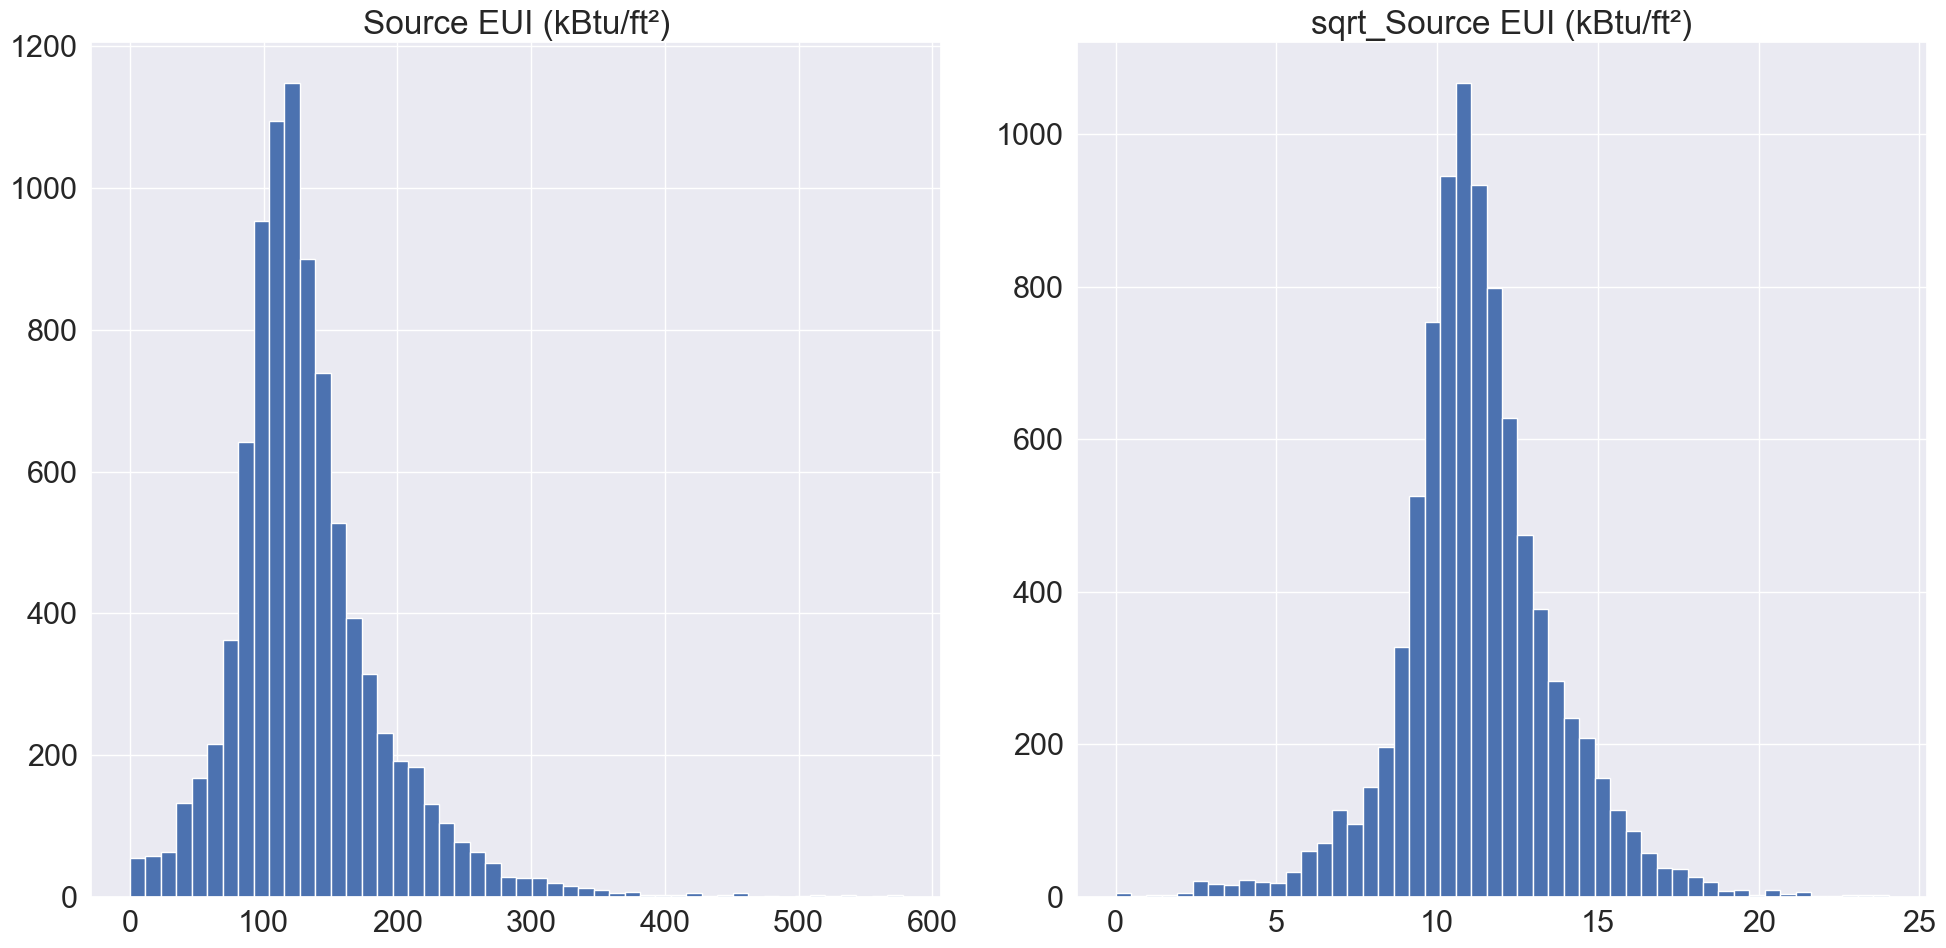

In [13]:
# plot the histogram to a num variables before and after transformation (sqrt)
numeric_subset.loc[:,["Source EUI (kBtu/ft²)", "sqrt_Source EUI (kBtu/ft²)"]].hist(bins=50, figsize=(20,10))
plt.tight_layout()
plt.show()

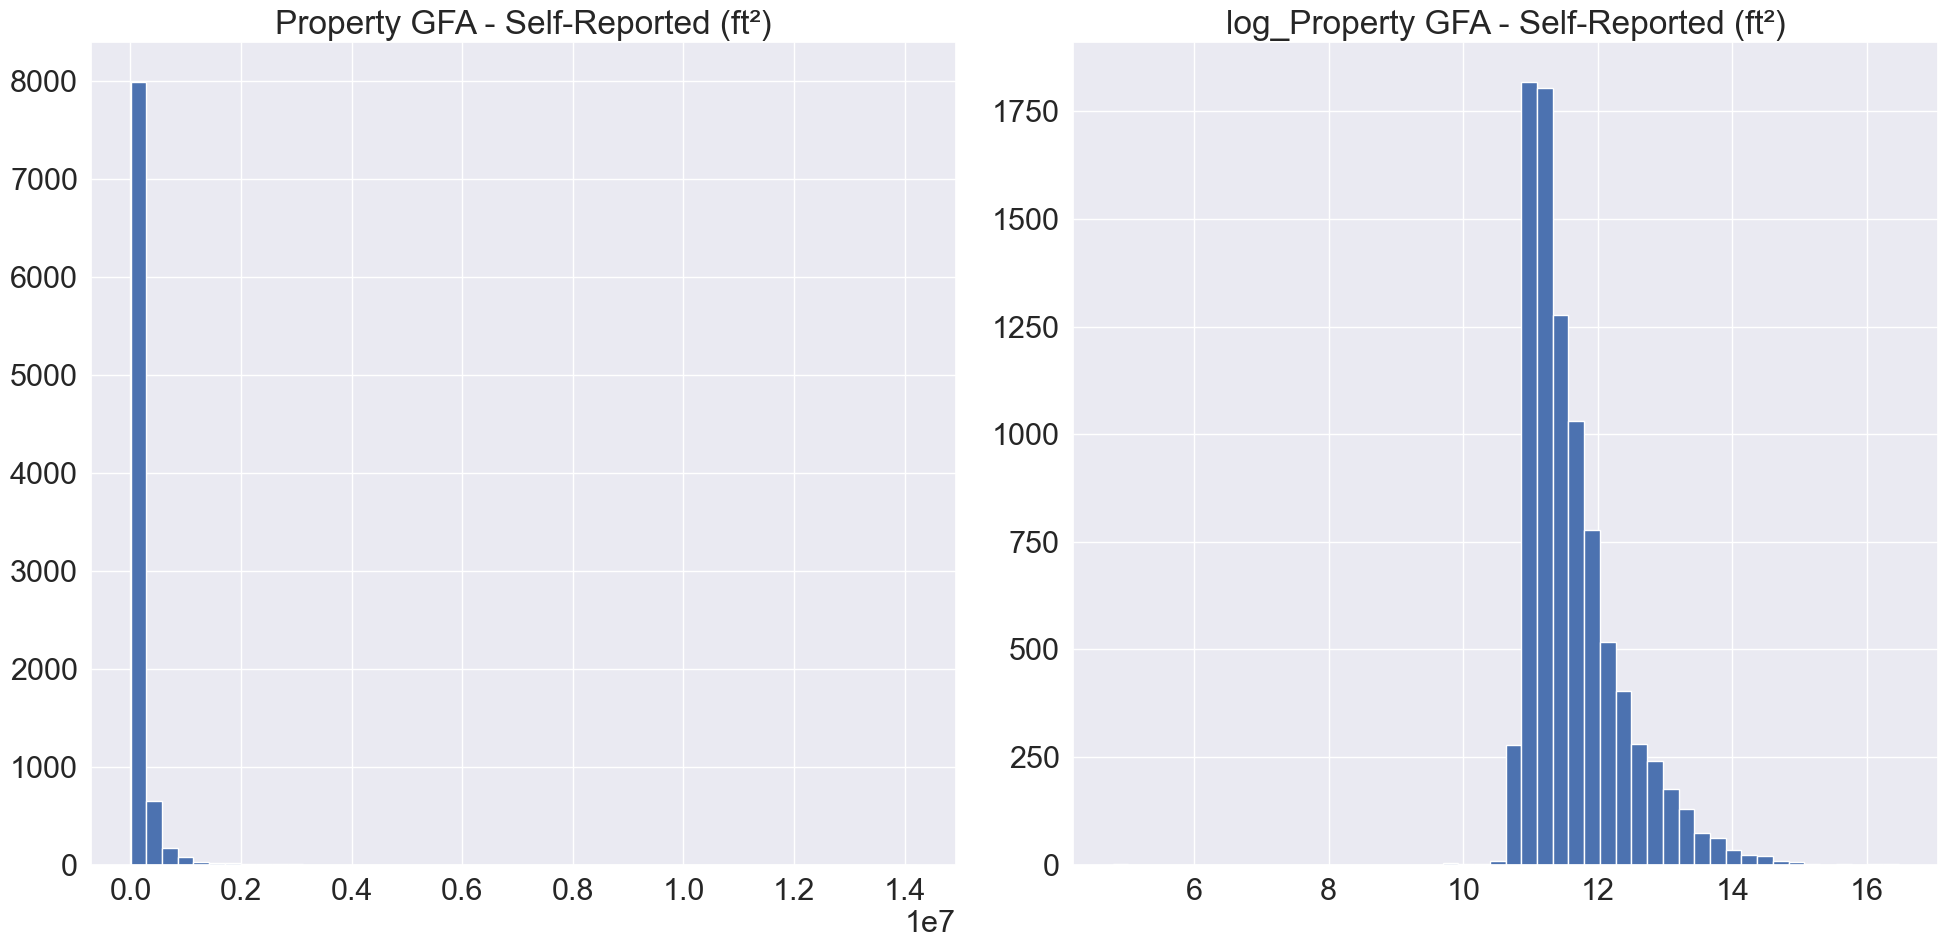

In [14]:
# plot the histogram to a num variables before and after transformation (log)
# note: log0 is undefined
numeric_subset.loc[:,["Property GFA - Self-Reported (ft²)", "log_Property GFA - Self-Reported (ft²)"]].hist(bins=50, figsize=(20,10))
plt.tight_layout()
plt.show()

In [15]:
# plot histogram and Q-Q plots for variables to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=50)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

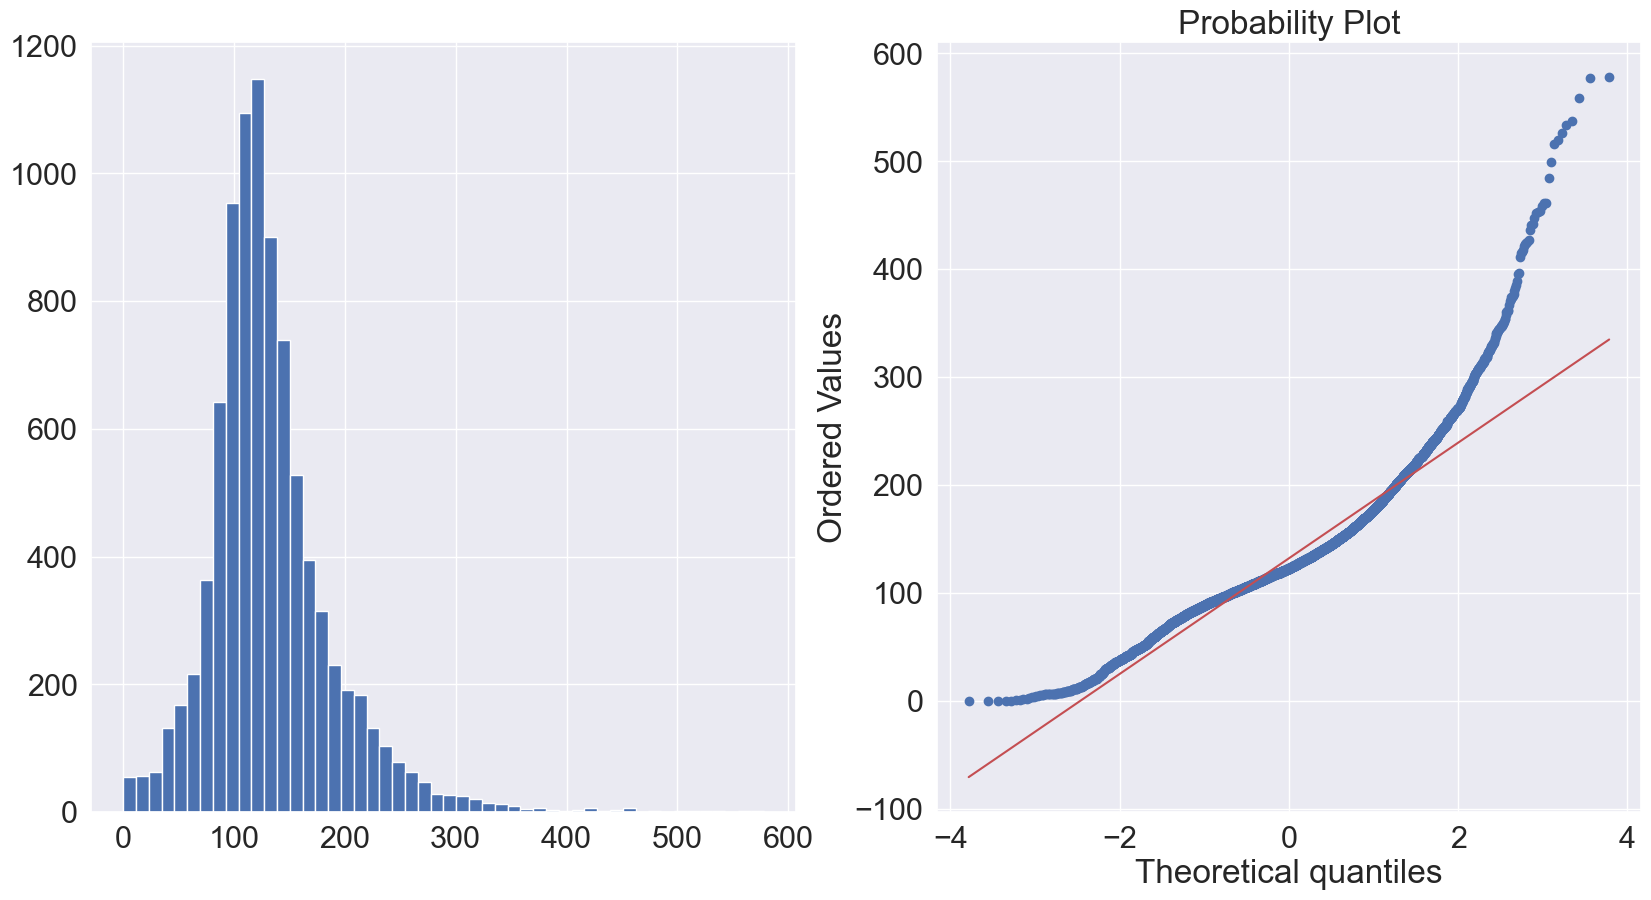

In [16]:
# check original distribution
diagnostic_plots(numeric_subset, "Source EUI (kBtu/ft²)")

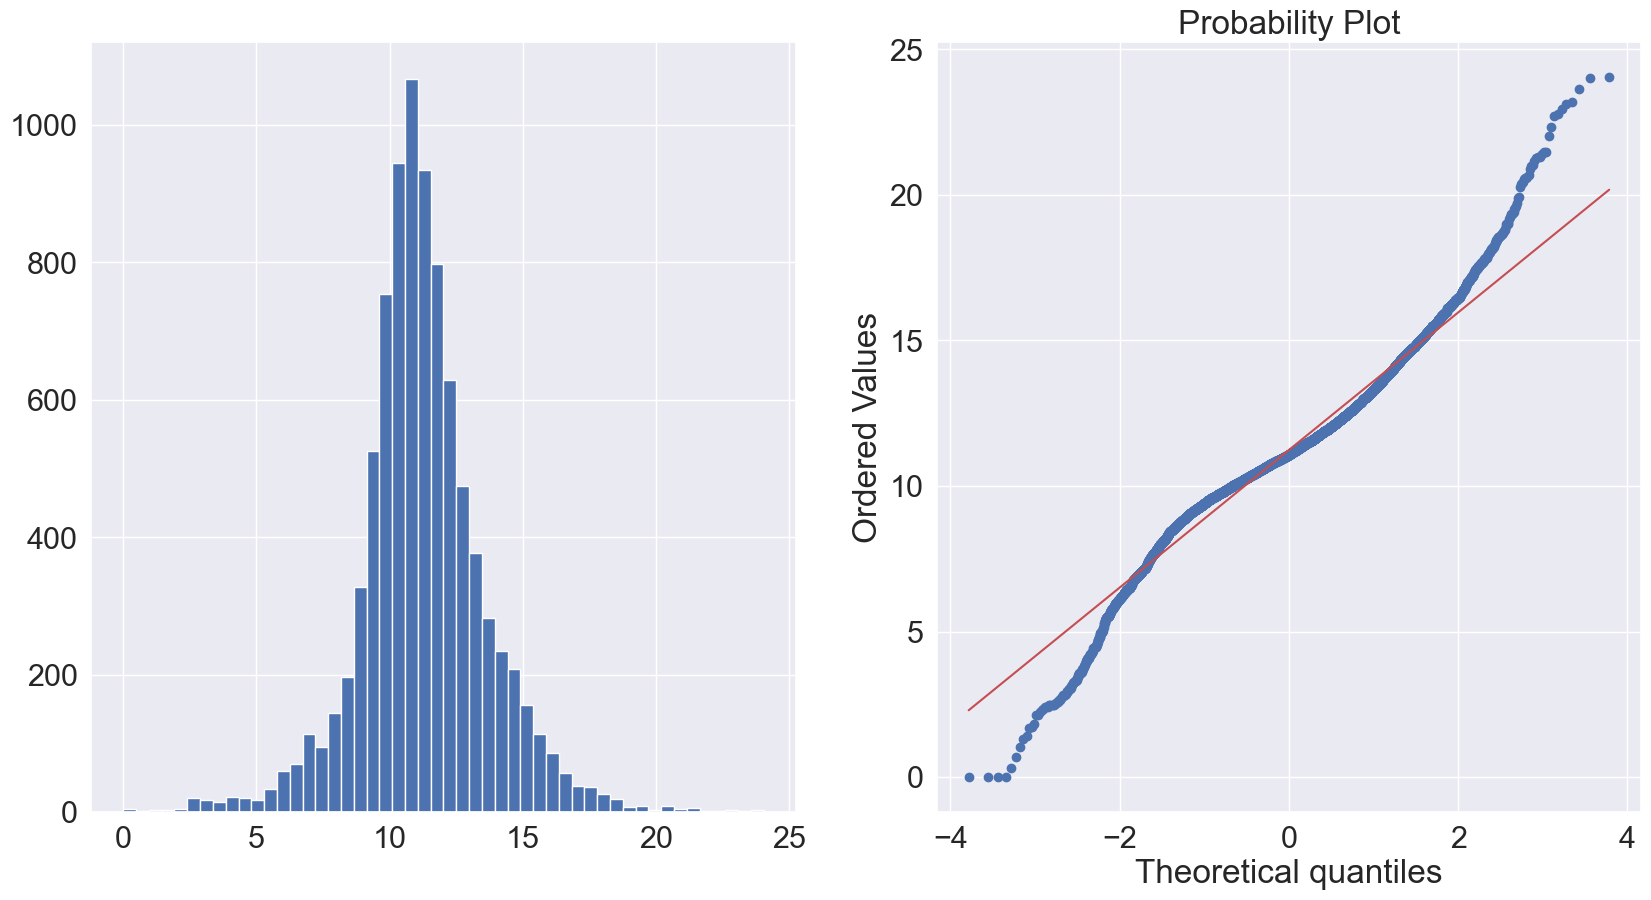

In [17]:
# plot histogram and Q-Q plots for variables after transformation
diagnostic_plots(numeric_subset, "sqrt_Source EUI (kBtu/ft²)")

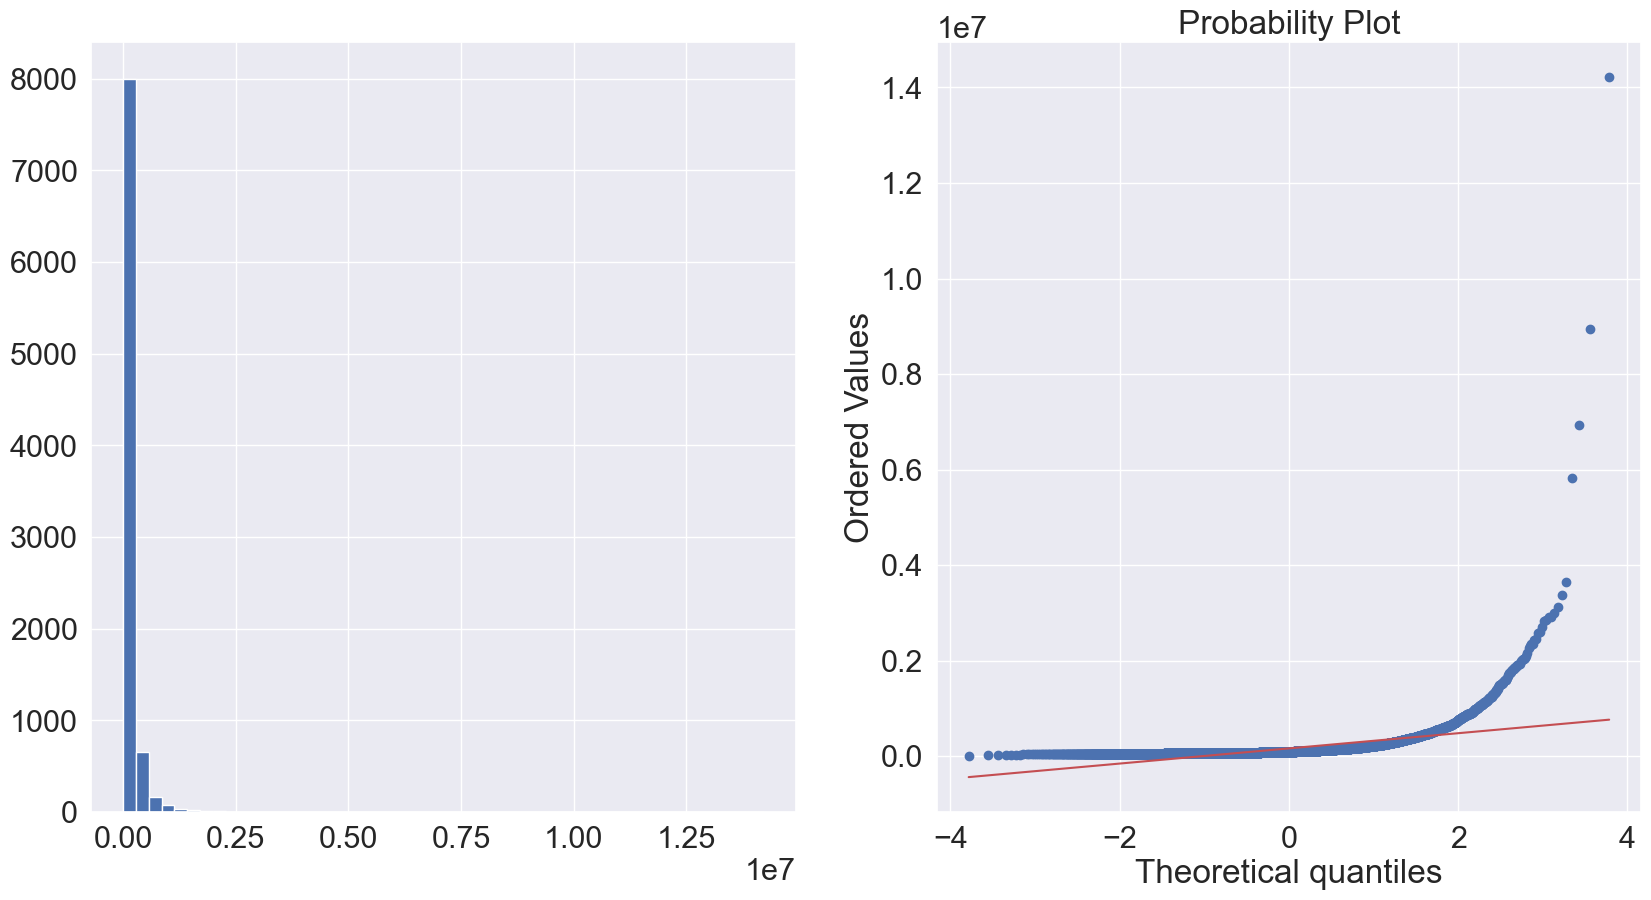

In [18]:
# check original distribution
diagnostic_plots(numeric_subset, "Property GFA - Self-Reported (ft²)")

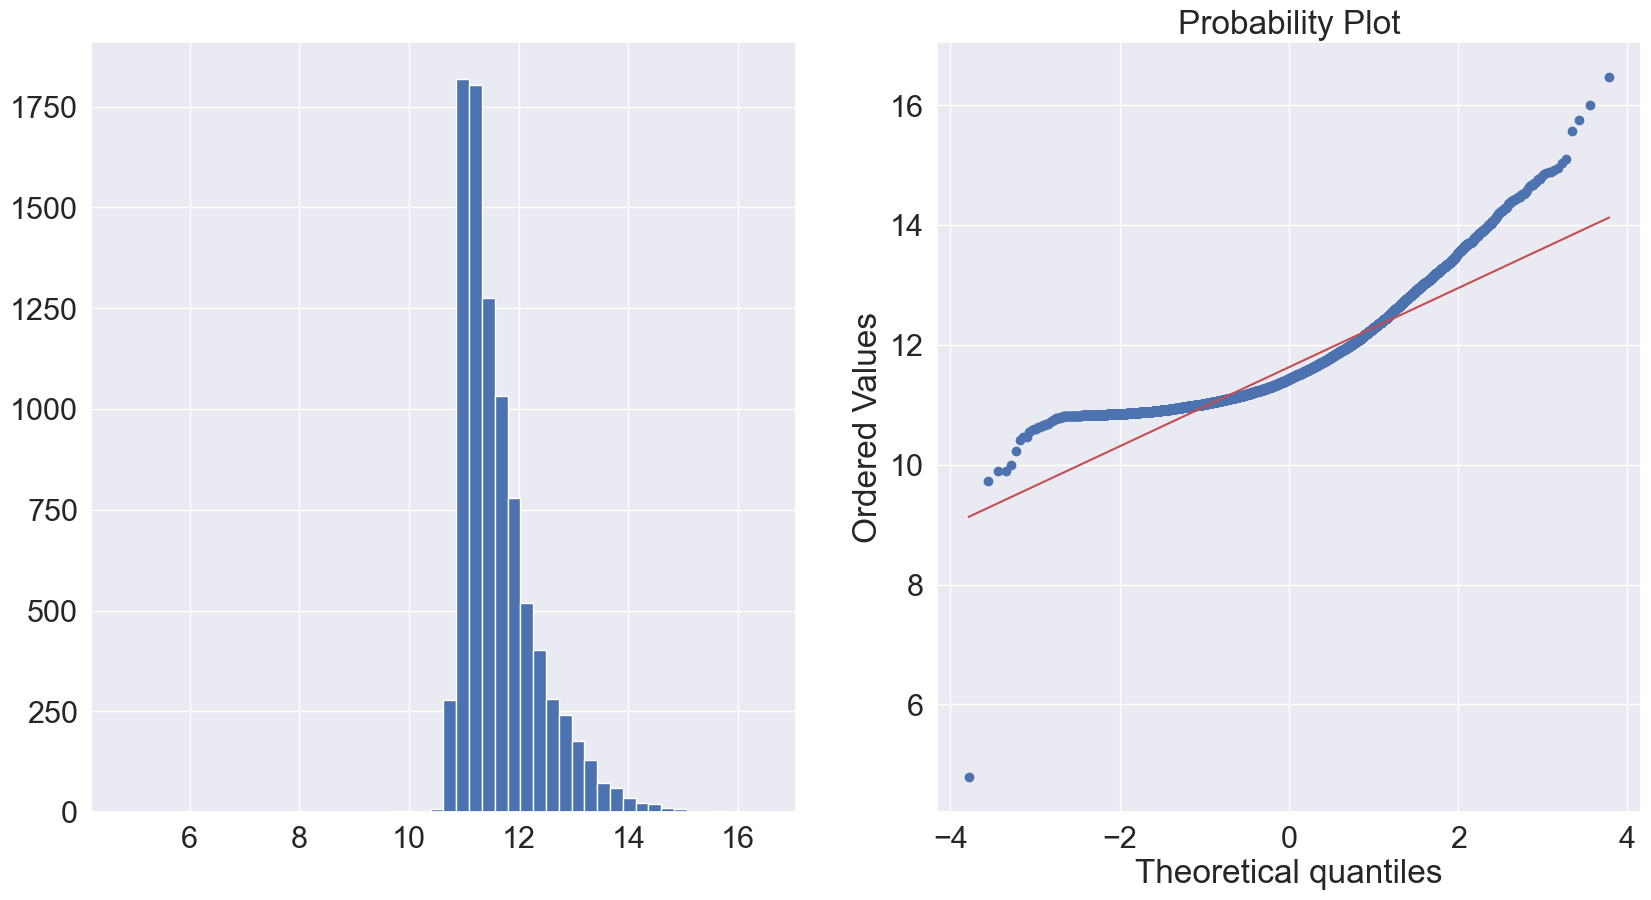

In [19]:
# plot histogram and Q-Q plots for variables after transformation
diagnostic_plots(numeric_subset, "log_Property GFA - Self-Reported (ft²)")

#### ii) Power Transformation

Exponential or power functions are mathematical transformations that follow 

\begin{equation}
X_t = X^{\lambda} 
\end{equation}

where $\lambda$ can be any exponent. 

The square and cube root transformations are special cases of power transformations where $\lambda$ is 1/2 or 1/3, respectively. In practice, we try different lambdas to determine which one offers the best transformation. 

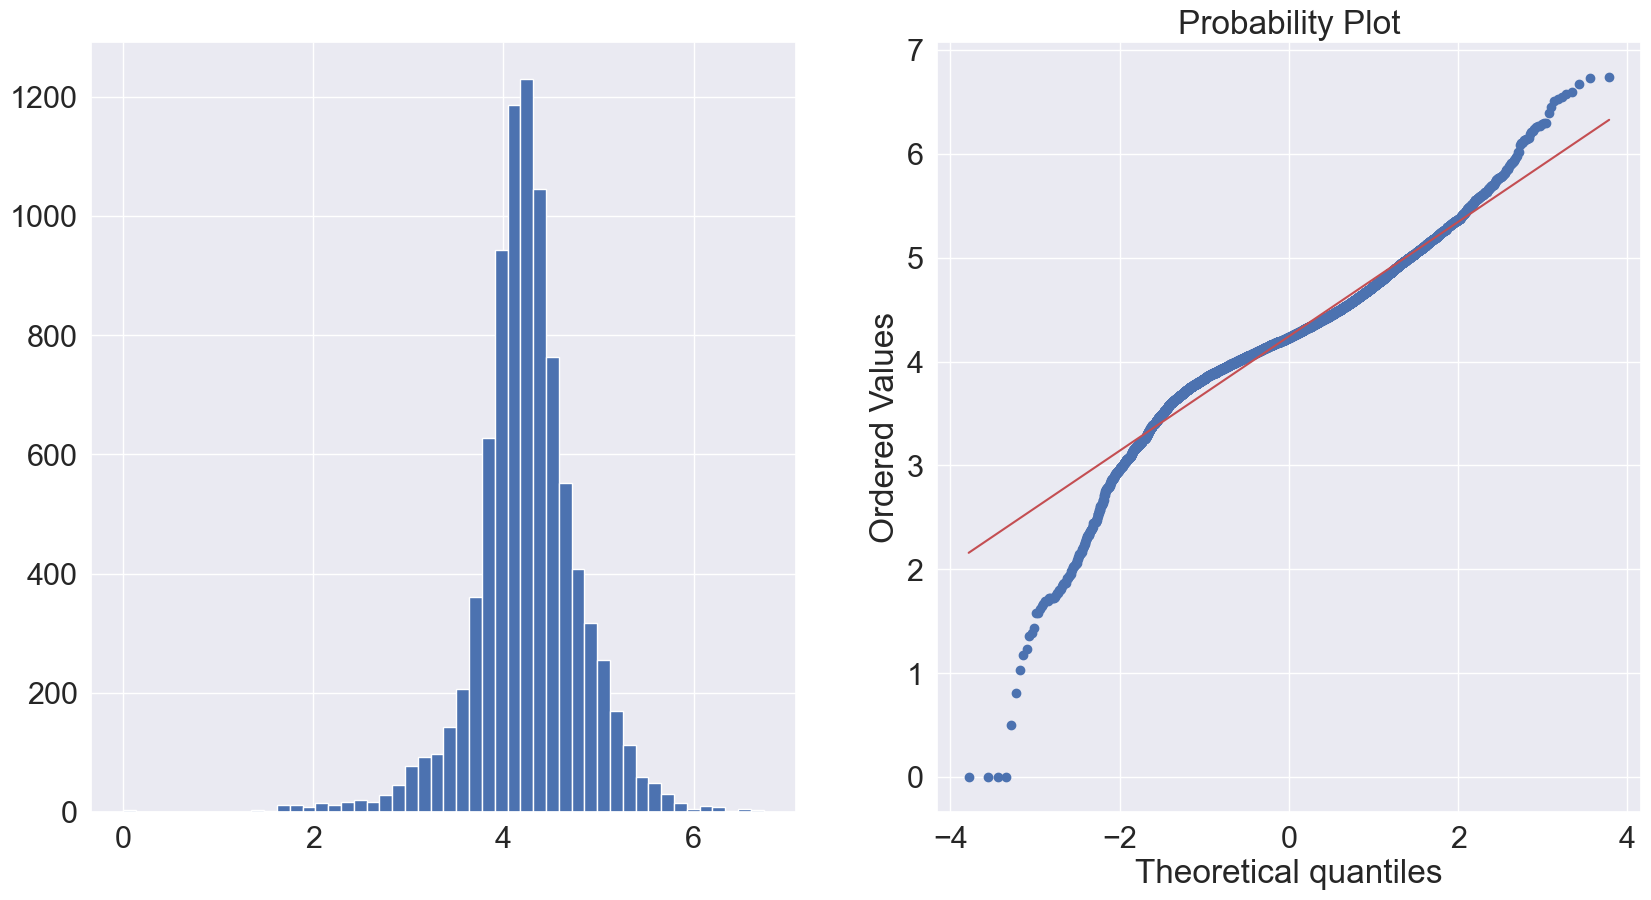

In [20]:
from feature_engine.transformation import PowerTransformer

# initialize the transformer with the variables to transform and the desired exponent

pt = PowerTransformer(variables = ['Source EUI (kBtu/ft²)', 'Property GFA - Self-Reported (ft²)'], exp=0.3)

# fit transformer to data
pt.fit(data)

# transform indicated variables in the dataset
data_tf = pt.transform(data)

# plot transform variable
diagnostic_plots(data_tf, 'Source EUI (kBtu/ft²)')

#### iii) Box-Cox Transformation
The Box-Cox transformation belongs to the power family of functions and is defined by 

\begin{equation}
X_t = 
\begin{cases}
  (X^{\lambda} -1) / {\lambda} & \text{if } \lambda \neq 0 \\    
  \log(X)  & \text{if } \lambda =0
\end{cases}
\end{equation}

where $X$ is the variable and λ is the transformation parameter. 

In the Box-Cox transformation, several values of λ are considered and the λ that returns the best transformation is selected. 

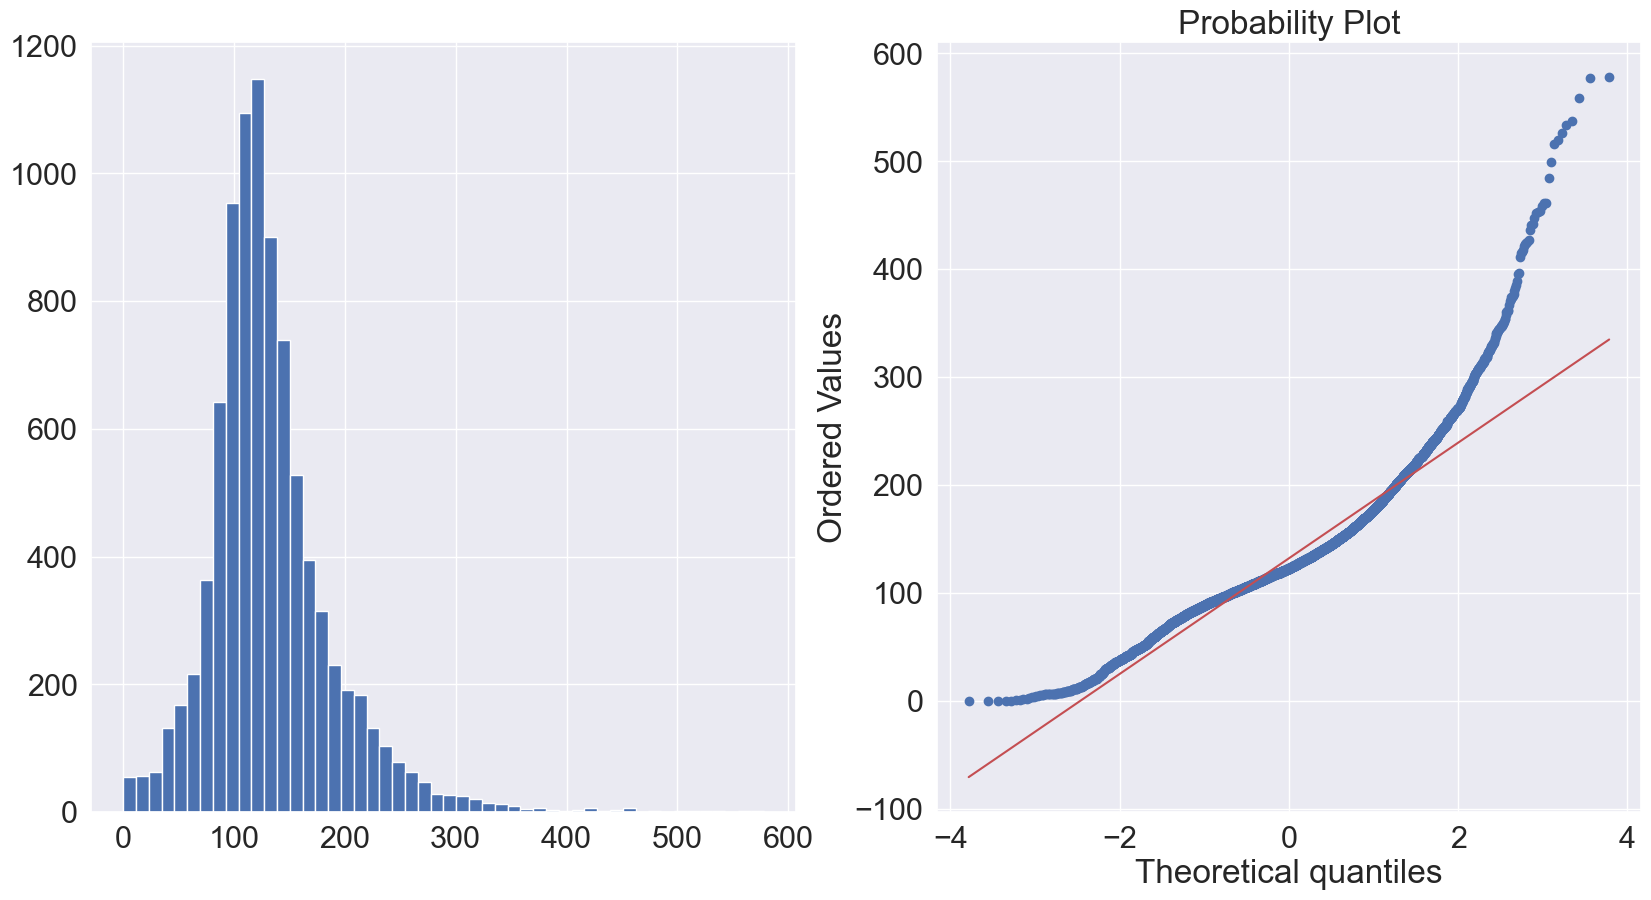

In [21]:
from feature_engine.transformation import BoxCoxTransformer

bct = BoxCoxTransformer(variables = ['Property GFA - Self-Reported (ft²)'])

# fit transformer to the data set
bct.fit(data)

# transform indicated variables in the dataset
data_tf = bct.transform(data)

# plot transformed variable
diagnostic_plots(data_tf, 'Source EUI (kBtu/ft²)')

In [22]:
# the transformer stores the optimal parameter for each variable in a dictionary in its attribute lambda_dict_
bct.lambda_dict_

{'Property GFA - Self-Reported (ft²)': -0.23154228774783558}

#### iv) Yeo-Johnson Transformation

The Yeo-Johnson transformation is an extension of the Box-Cox transformation and can be used on variables with zero and negative values, as well as positive values. These transformations can be defined as follows:


\begin{equation}
X_t = 
\begin{cases}
  ((X+1)^{\lambda} -1) / {\lambda} & \text{if } \lambda \neq 0, X \geq 0 \\    
  \log(X+1)  & \text{if } \lambda =0, X \geq 0\\
  -[(-X+1)^{2-\lambda} - 1] / (2-\lambda) & \text{if } \lambda \neq 2, X < 0 \\
   -\log(-X+1)  & \text{if } \lambda =2, X < 0\\
\end{cases}
\end{equation}

where $X$ is the variable and λ is the transformation parameter. 

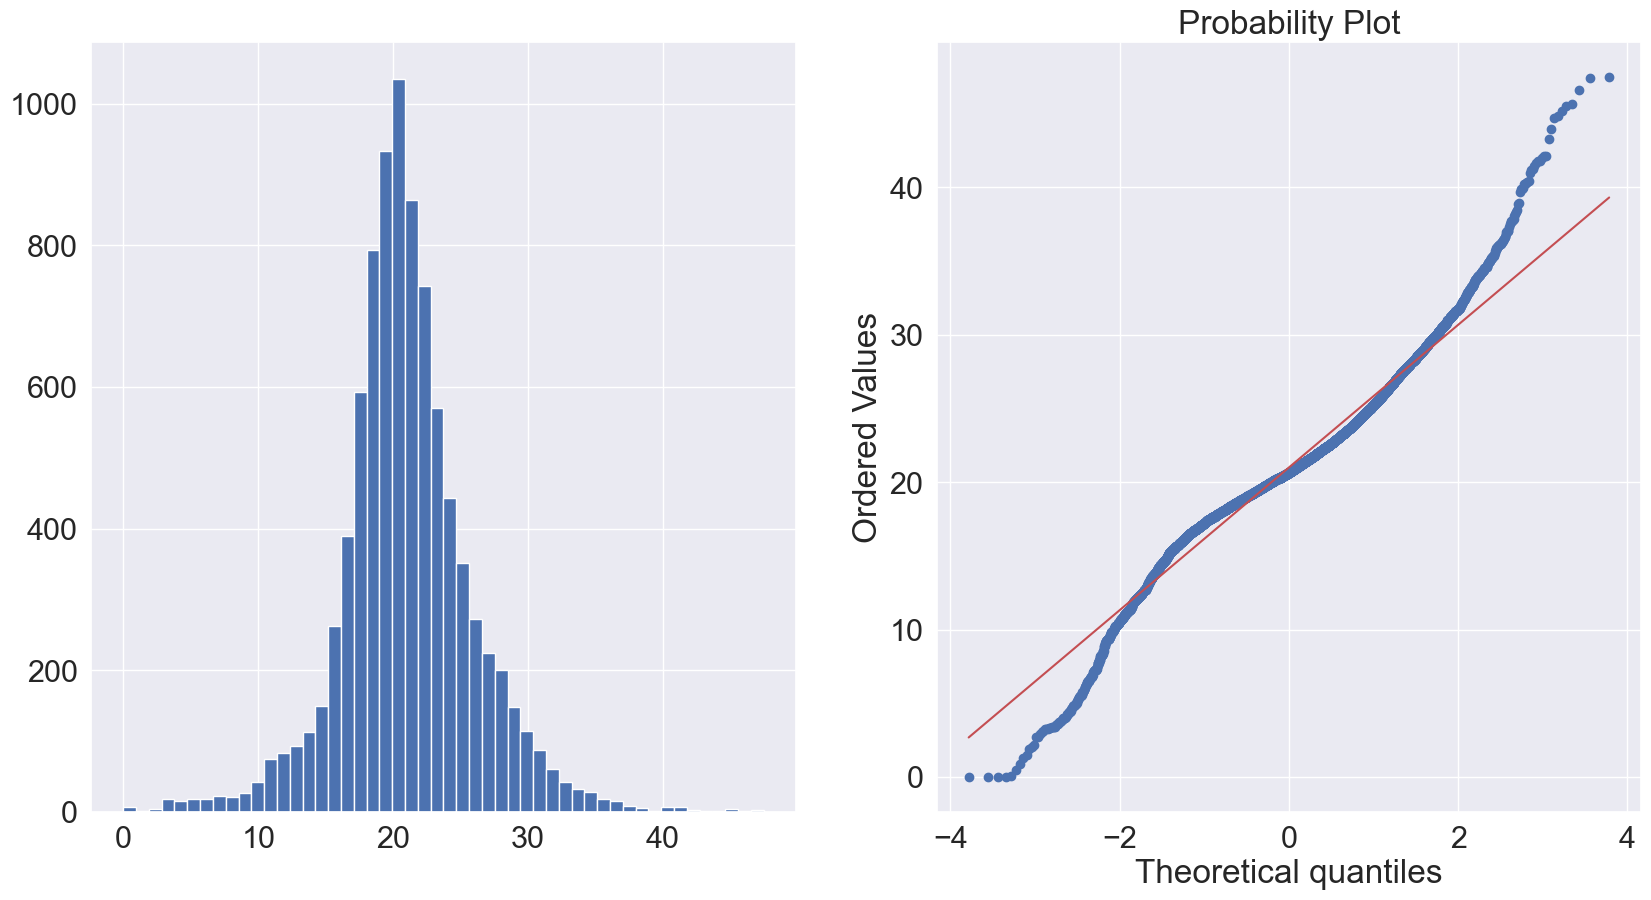

In [23]:
from feature_engine.transformation import YeoJohnsonTransformer

# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = ['Source EUI (kBtu/ft²)', 'Property GFA - Self-Reported (ft²)'])

# fit transformer to the data set
yjt.fit(data)

# transform indicated variables in the dataset
data_tf = yjt.transform(data)

# plot transformed variable
diagnostic_plots(data_tf, 'Source EUI (kBtu/ft²)')

<a name="1.5.2"></a>  
### 1.5.2 Feature Scaling

- Feature scaling is the method of bringing the values of a features to within the same scale (e.g., min-max scaling involves converting values of columns to between 0 and 1)
- Feature scaling bring each feature to the same level footing without any upfront importance that may occur due to the magnitude of their absolute values. This makes sure that each feature does not disproportionally influence the model simply due to magnitude. 
- Standardization is a popular feature scaling technique, where we convert features to values with mean of 0 and standard deviation of 1
- While standardizing would not affect the accuracy of a linear regression model, it makes it harder to interpret model coefficients as size effects and can significantly impact the regularisation process (explained later in the notebook).

#### Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

numeric_subset = data.select_dtypes('number')

# Initialize standard scaler object
scaler = StandardScaler()

# Fit and transform
scaler.fit(numeric_subset)
standardized_data = scaler.transform(numeric_subset)

print(pd.DataFrame(standardized_data))

            0         1         2         3         4         5         6   \
0    -1.829113 -1.750966 -0.984947       NaN  0.884475 -1.512086  0.172127   
1    -1.827291 -1.749540 -0.848683       NaN  0.568988 -0.298826  0.172127   
2    -1.826987 -1.749302  1.267740  0.052686  0.164423 -0.298826 -0.072457   
3    -1.826683 -1.749064  1.267735 -0.201224 -0.140450 -0.298826 -0.072457   
4    -1.826379 -1.748826 -0.823356       NaN  0.112601 -1.242472  0.172127   
...        ...       ...       ...       ...       ...       ...       ...   
8974  1.734147  1.809206  1.221626 -0.305139 -0.287961 -0.669544 -0.072457   
8975  1.734450  1.809443  1.221590 -0.229755 -0.220999 -0.736947 -0.072457   
8976  1.734754  1.809681  0.922485       NaN -0.186941 -1.175069 -0.072457   
8977  1.735058  1.809919  1.221636 -0.347428 -0.334613 -0.669544 -0.072457   
8978  1.735362  1.810394  1.232849 -0.337876 -0.324074 -0.602141 -0.072457   

            7         8         9         10        11        1

#### Min-Max Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

numeric_subset = data.select_dtypes('number')

# Initialize min-max scaler object
scaler = MinMaxScaler() # Transforms values between range of 0 and 1

# Fit and transform
scaler.fit(numeric_subset)
standardized_data = scaler.transform(numeric_subset)

print(pd.DataFrame(standardized_data))

            0         1         2         3         4         5         6   \
0     0.000000  0.000000  0.439592       NaN  0.027866  0.723150  0.012903   
1     0.000511  0.000401  0.463355       NaN  0.021455  0.809069  0.012903   
2     0.000597  0.000467  0.832429  0.009570  0.013233  0.809069  0.006452   
3     0.000682  0.000534  0.832428  0.003864  0.007038  0.809069  0.006452   
4     0.000767  0.000601  0.467772       NaN  0.012180  0.742243  0.012903   
...        ...       ...       ...       ...       ...       ...       ...   
8974  0.999659  0.999666  0.824387  0.001528  0.004040  0.782816  0.006452   
8975  0.999744  0.999733  0.824381  0.003223  0.005401  0.778043  0.006452   
8976  0.999830  0.999800  0.772221       NaN  0.006093  0.747017  0.006452   
8977  0.999915  0.999866  0.824389  0.000578  0.003092  0.782816  0.006452   
8978  1.000000  1.000000  0.826344  0.000793  0.003306  0.787589  0.006452   

        7         8         9         10        11        12   

<a name="1.5.3"></a>  
### 1.5.3 Which Algorithms Require Scaling?
- Feature scaling is essential for machine learning algorithms that calculate distances between data.
- If not scaled, the features with a higher value range starts dominating in the distance calculations, and this makes the model unable to learn from other features correctly as expected
- With scaling, each feature contributes approximately proportionately to the final distance
- Some examples of algorithms where feature scaling **matters** are:
  -	K-nearest neighbors (KNN) and K-Means based on Euclidean distance measure is sensitive to magnitudes and hence should be scaled for all features.
  - Support vector machines (SVM)
  -	Scaling is critical while performing Principal Component Analysis (PCA). PCA tries to get the features with maximum variance, and the variance is high for high magnitude features and will therefore skew the PCA towards high magnitude features.
  - Regression models (linear regression and logistic regression) does not always need scaling for prediction, but it is useful for interpretation of the model. In regression, it is often recommended to scale the features so that the predictors have a mean of 0. This makes it easier to interpret the intercept term as the expected value of Y when the predictor values are set to their means
  - If you train a linear regression without prior scaling, you cannot use the coefficients as indicators of feature importance.
  -	Scaling has no effect on plain regression, but required if you use regularization, and helpful if you want to interpret the coefficients as effect sizes
  -	Regularized linear models (e.g. Lasso, Ridge, Elastic) require scaling. This is because the scale of the variables affect the how much regularization will be applied to the specific variables. Scaling tries to ensure that penalization is applied fairly across all predictors, regardless of the scale of measurement. You don't want penalization of a predictor based on length to depend on whether you measured the length in millimeters or miles.
  

- Some examples of algorithms where feature scaling does **NOT** matter are:
   -	Naïve Bayes algorithm (based on probability and not distance)
   -	Decision Trees and Tree-based algorithms e.g., CART, random forests, gradient boosted decision trees because splitting in these cases are based on the actual values


<a name="1.5.4"></a>  
### 1.5.4 Scaling and Train-Test Split
- For standardization, the right way to do this is to use only the training set to calculate the mean and variance, normalize the training set (i.e. use `fit_transform`)
- Then at test time, reuse that same (training) mean and variance to normalize the test set.
- For min-max scaling, when `fit_transform` on training dataset, we will get ranges between 0 and 1. If the test set has values larger or smaller than the min max of the train set, the corresponding values will be >1 and <0 respectively.
- For example, if a feature in train set has values [100,200,300], the scaler will transformed it into [0, 0.5, 1]. When this scaler is also applied on the test set of [0, 400], the transformed value becomes [-0.5, 1.5] i.e. beyond the [0,1] range for train set


___
<a name="1.6"></a>  
## 1.6 Feature Transformation - Categorical Features
- Categorical variables need special treatment depending on your approach

<a name="1.6.1"></a>  
### 1.6.1 Dummy encoding (aka One-Hot Encoding)

__What is dummy encoding and why do we do it?__

* Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric. This means that categorical variable must be converted to a numerical form and this conversion is known as dummy encoding
* It is useful to take categorical variable as a predictor in statistical models. Categorical variable can take values 0 and 1

✍️ **Example:** Let’s take a variable ‘gender’. We can produce two variables, namely, “Var_Male” with values 1 (Male) and 0 (No male) and “Var_Female” with values 1 (Female) and 0 (No Female). We can also create dummy variables for more than two classes of a categorical variables with n or n-1 dummy variables in a similar way.

To try and capture any possible relationships between the borough or building type (remember these are categorical variables) and the score we will have to one-hot encode these columns.

[pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

**One-hot encoding for categorical variables**

Below code dummifies 2 categorical variables using `get_dummies` function in pandas.

In [26]:
categorical_subset = data[['Borough', 'Largest Property Use Type']]
categorical_subset = pd.get_dummies(categorical_subset, drop_first = True)

categorical_subset.head()

,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,Borough_Staten Island,Largest Property Use Type_Multifamily Housing,Largest Property Use Type_Non-Refrigerated Warehouse,Largest Property Use Type_Office
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0
3,0,1,0,0,1,0,0
4,0,0,0,0,1,0,0


__Observation__

* Borough variable had 5 distinct values. After dummifying, 4 new continuous variables have been created as can be seen above.<mark>
* 5th variable has been dropped randomly while converting borough from continuous to categorical because 5th variables provides redundant information. If we know the values present inside any 4 columns created from borough column, then can easily guess what is the value inside the 5th column.<mark>
* This is exactly what drop_first snippet inside pd.get_dummies do<mark>
* This is why we get n-1 variables when we convert a categorical variable with n distinct values to a continuous variable<mark>

<a name="1.6.2"></a>  
### 1.6.2 Ordinal encoding

- One-hot encoding works well for categorical variables where the individual categories have no particular weather. 
- For example, the dataset may have a feature for weather, with the different categories `["rainy", "snowy", "sunny"]` which one hot encoding would capture by generating different features for each category.
- However, there are instances where the categories have a particular ordering which we would like to capture. 
- For example, the dataset may have a variable for heat level with categories `["high", "medium", "low"]`. 
- In this instance, one-hot encoding would not capture the relative differences between the different categories. 
- Therefore ordinal encoding is applied for such variables, where each category is mapped to a specific value. With the heat level example, `["high", "medium", "low"]` may be mapped to `[1, 2, 3]`, in which case the total number of features would remain the same. 

The relevant code is provided below:

In [27]:
enc = OrdinalEncoder(categories= [['Low','Medium', 'High']])
X = [['Low'], ['Medium'], ['High']]
enc.fit(pd.DataFrame(X))
print(enc.categories_)

enc.transform([['Low'], ['Medium'], ['High']])

[array(['Low', 'Medium', 'High'], dtype=object)]


array([[0.],
       [1.],
       [2.]])

<a name="1.6.3"></a>  
### 1.6.3 Other encoding methods

These encoding methods are less commonly used but may result in powerful features in specific instances:
- Impact encoding: Effective in practice but makes interpretation harder. Eg, for a classification problem:
    - For each level of the categorical variable, calculate the mean of the dependent variable in the training data set
     - Create a numeric variable with this value 

- Frequency encoding: Typically not very effective in practice. Eg, for a classification problem:
    - For each level of the categorical variable, calculate number of times this occurs
    - Replace the categorical variable by a numeric variable with the rank of the frequency of occurrence 
    
Let us encode the `Borough` variable using Impact and Frequency encoding respectively.

In [28]:
# identify unique categories in input variable
data.loc[:,"Borough"].unique()

array([nan, 'Manhattan', 'Queens', 'Brooklyn', 'Staten Island', 'Bronx'],
      dtype=object)

#### Impact encoding (also known as Mean/Target encoding)

In [29]:
# input and target variables
data.loc[:,["Borough", "score"]]

,Borough,score
0,NaN,93.0
1,NaN,72.0
2,Manhattan,67.0
3,Manhattan,80.0
4,NaN,100.0
...,...,...
8974,Brooklyn,98.0
8975,Brooklyn,16.0
8976,NaN,83.0
8977,Brooklyn,92.0


In [30]:
# calcuate mean score (target variable) for each unique category of input variable
bdict_ie = {}

for each in data.loc[:,"Borough"].unique():
    bdict_ie[each] = data.loc[data.loc[:,"Borough"]==each,"score"].mean()
    
bdict_ie

{nan: nan,
 'Manhattan': 59.24616185271923,
 'Queens': 62.87234042553192,
 'Brooklyn': 64.11453744493392,
 'Staten Island': 61.266666666666666,
 'Bronx': 58.438244514106586}

In [31]:
# encode input variable using dictionary mapping
data["Borough_ie"] = data["Borough"].map(bdict_ie)
data["Borough_ie"]

0             NaN
1             NaN
2       59.246162
3       59.246162
4             NaN
          ...    
8974    64.114537
8975    64.114537
8976          NaN
8977    64.114537
8978    64.114537
Name: Borough_ie, Length: 8979, dtype: float64

#### Frequency encoding

In [32]:
# calcuate mean score (target variable) for each unique category of input variable
bdict_fe = {}

for each in data.loc[:,"Borough"].unique():
    bdict_fe[each] = data.loc[data.loc[:,"Borough"]==each,"score"].count()
    
bdict_fe

{nan: 0,
 'Manhattan': 3843,
 'Queens': 1598,
 'Brooklyn': 1816,
 'Staten Island': 90,
 'Bronx': 1595}

In [33]:
# encode input variable using dictionary mapping
data["Borough_fe"] = data["Borough"].map(bdict_fe)
data["Borough_fe"]

0          0
1          0
2       3843
3       3843
4          0
        ... 
8974    1816
8975    1816
8976       0
8977    1816
8978    1816
Name: Borough_fe, Length: 8979, dtype: int64

<a name="1.6.4"></a>  
### 1.6.4 Recoding

- Often times numeric values may be mapped to suitable categories depending on the context. 
- For example, if you have a dataset containing the age of individuals, and you believe that people in the 20-60 range would have different characteristics than those in the 1-19 and 60+ range, you can map the numeric field into a categorical one with three different catgories: `["1-19","20-60","60+"]`
- Sometimes, numeric variables are recoded to categories based on the decile they lie in. This can be achieved using the code below:

In [34]:
data_copy = data.copy()
field_to_change = 'DOF Gross Floor Area'

data_copy[field_to_change + ' Deciles'] = pd.cut(data_copy[field_to_change], bins = 10) # Generate 10 buckets based on decile

data_copy[[field_to_change, field_to_change + ' Deciles']].head()

,DOF Gross Floor Area,DOF Gross Floor Area Deciles
0,NaN,NaN
1,NaN,NaN
2,179130.0,"(36537.915, 1399036.5]"
3,102150.0,"(36537.915, 1399036.5]"
4,NaN,NaN


<a name="1.6.5"></a> 
### 1.6.5 Interaction Terms
- Pairwise interactions between predictors are prime candidates for exploration and may contain valuable predictive relationships with the target response.
- When beginning the search for interactions, expert knowledge about the system will always be most beneficial and can help narrow the search
- Interactions are simply generated by multiplying the values of each predictor. These new terms can be added to the data and passed in as predictors to a model.
- For data that has a small number of predictors, all pair-wise interactions can be created. 
- For example, if we have numerical features, we could multiply two features [A x B] and produce one feature that has an expression of those two features. 
- Beyond that, if we have 5 features, we could multiply them all together if there are numerical features and then end up with one feature instead of say five. 
- We can also take categorical features and even numerical features and combine them in ways that make sense. 
- For example, a (binary) categorical variable of whether a person is a student or not (1 / 0) can be multipled with distance from train station (numerical value in metres)

___
<a name="1.7"></a> 
## 1.7 Feature Transformation - Date/Time Features
- Raw dates are usually meaningless and need to be transformed. This could be achieved by the following methods
- For example, "date of birth" as a feature is useless. Age is much more interesting, eg "today's date" minus "date of birth" in years
- For time series data, we can generate a large number of features based on the history

### Window Features
- Pick a set of lookback windows from each point (eg 30 days, 90 days, 365 days)
- Then calculate pretty much any aggregation you can think of for that period, eg:
  - Sum or count (eg number of complaints in the last 365 days)
  - Mean, standard deviation, min, max
  - Trend (eg last point minus first point, or ratio of last point to first point)
  - Number of times that the quantity changes sign
  - Number of times the quantity reaches the max and min
  - Spectral methods: eg, fast Fourier Transform (FFT) of the data, then use the FFT coefficients
  - …the list goes on and is potentially endless

### "Time since" features
- For rare events or to ensure that you include very long histories, calculate the "time since" an event, eg
  - Number of days/weeks since customer bought their new phone
  - Tenure (number of years they have been a customer)

### Combinations
- E.g, number of times the customer has come within 75% of their max data usage relative to the number of times the mean customer on that plan has come within 75% of their max data usage in the last 365 days

#### Note that the above content is a mix of feature transformation and feature construction (which we will cover shortly)

### ✍️ Example: Thinking in Context
Think about how you can link pieces of data and undertake aggregations to increase the informativeness of your features based on your hypotheses

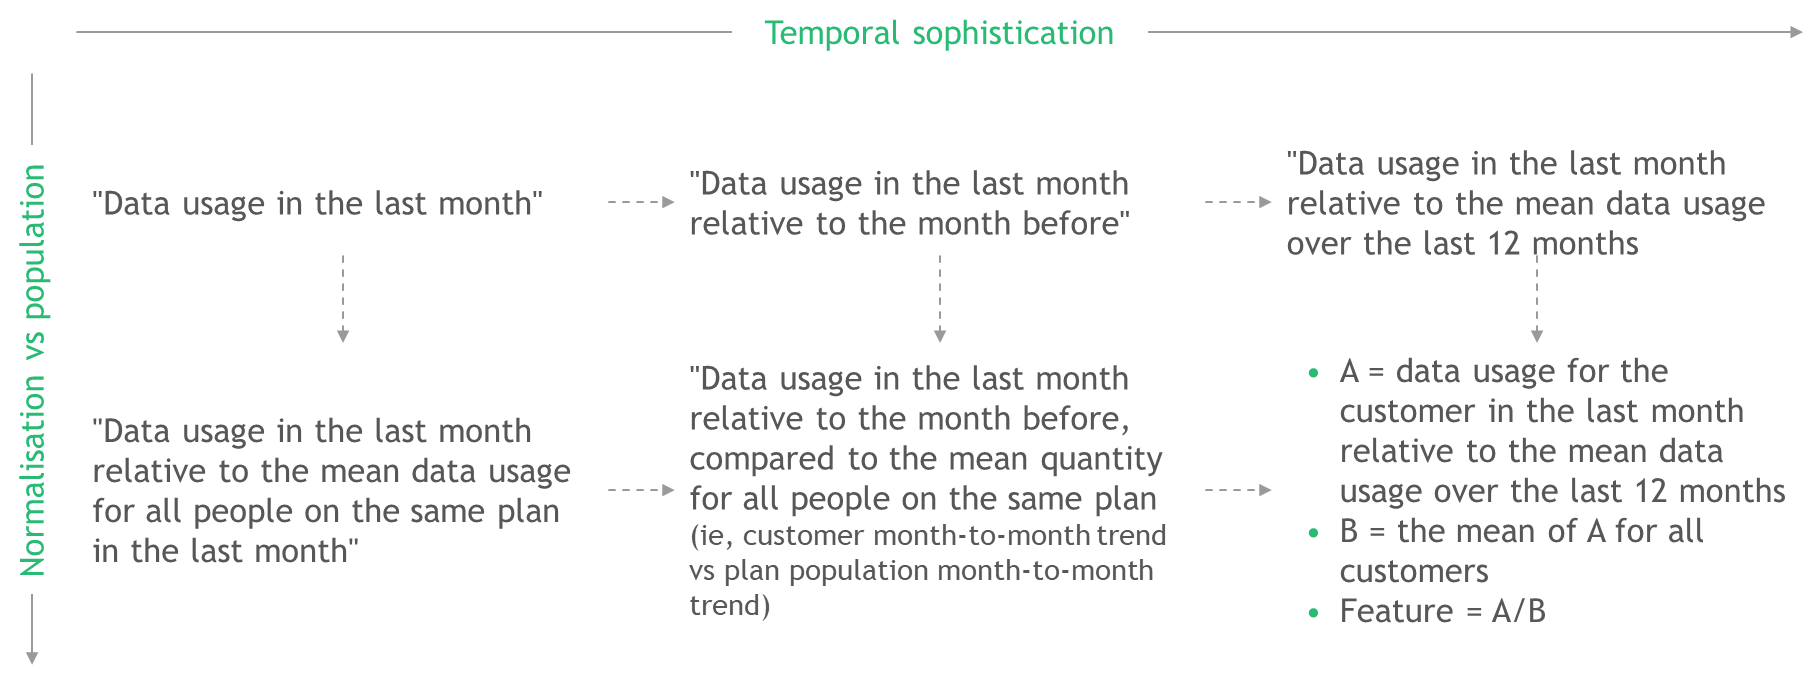

___
<a name="1.8"></a>
## 1.8 Feature Construction (aka Feature Synthesis)

- Synthesising new features from existing ones can add substantial performance!

**Examples for Tabular Data:**
- Aggregating or combining features to create new features
- Decomposing or splitting features to create new features

**Examples for Textual Data:**
- Devising document or context specific indicators relevant to the problem e.g., presence of certain key words in document

**Examples for Image Data:**
- Prescribing automatic filters to pick out relevant structures e.g., sharp corners on images


### ✍️ Real Case Examples:
- Let's say you are building a cross sell model for an insurance client (i.e. sell additional relevant products to client). 
- You have a date in the data when a customer bought the first product from your company and he/she is still active. 
- Using this information, you can derive a feature which will indicate the tenure of the customer (i.e. how long customer has been with the company). 
- The hypothesis would be that the higher the tenure, the higher the chances that he/she will go for another product
- On similar problem, we can count the number of products a customer has and create a derived feature using this idea. Hypothesis would be higher the number of products owned by a customer, higher the chances that he/she will go for another product.


**💬 Chat Discussion**
What features would you want in order to predict who survived the Titanic sinking?

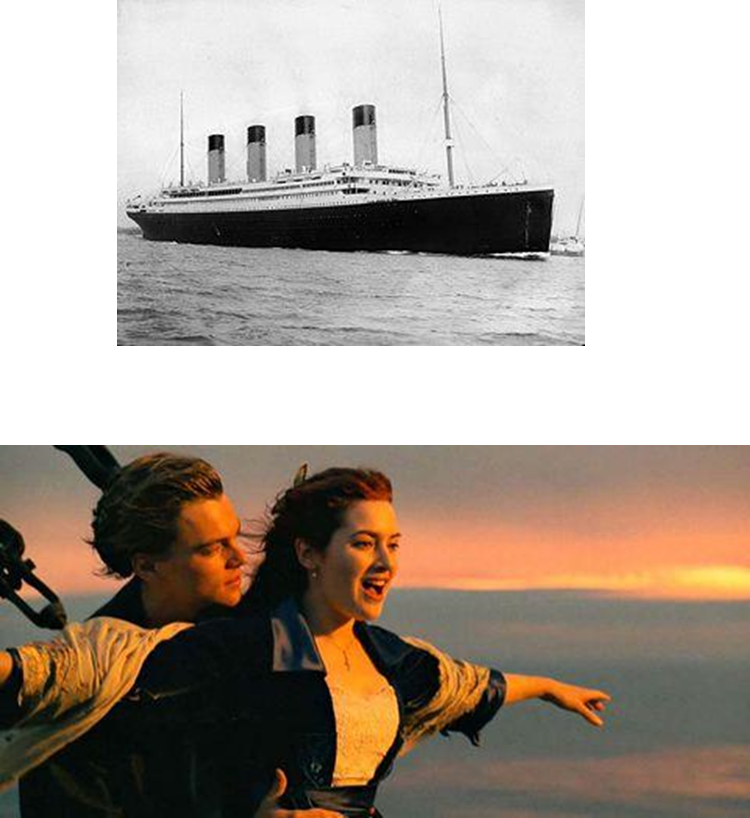

Some common strategies for feature synthesis include:

- Calculate ratios or differences from aggregations relative to categorical variables
    - Group by categorical
    - Calculate some aggregated quantity (eg mean, standard deviation)
    - Calculate value of item relative to that aggregation (eg value/mean, [value-mean]/stddev

- Calculate aggregations over time
    - Eg, number of missed payments in last 5 years

- Calculate ratios or differences through time
    - Eg, % chance in revenue over time period

- Calculate ratios or differences relative to business-important numbers
    - Percentage of data used vs plan

- Combine these approaches


#### ✍️ Feature synthesis example: value relative to categorical field

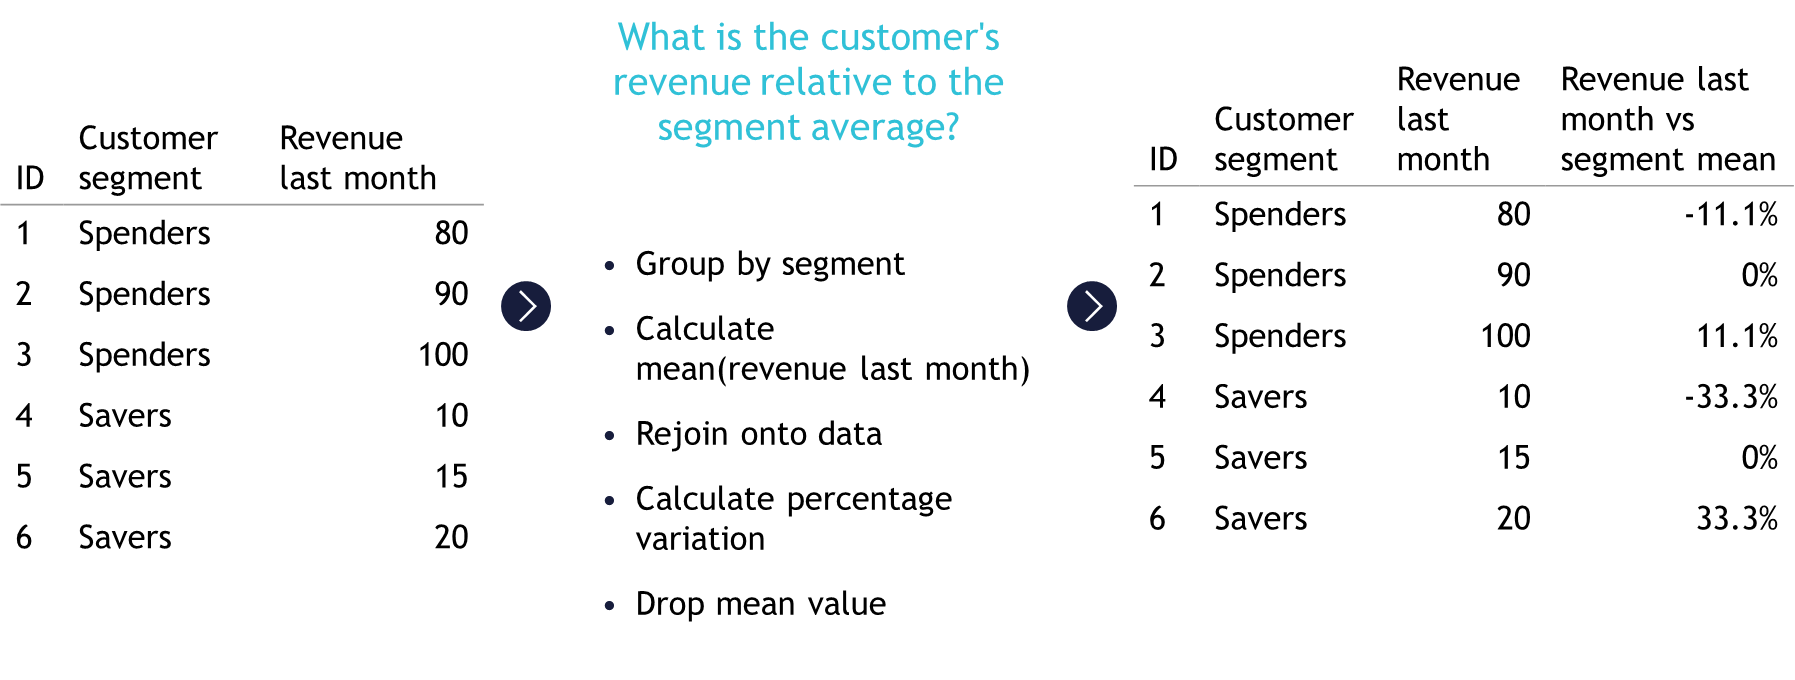

#### 💬 Chat Discussion
Propose some suitable ratio based features that can be generated using the data above 

___
<a name="1.9"></a>
## 1.9 Handling Missing Values

- Understanding how missing values should be treated can often form a significant part of the feature engineering process. 
- Explicit numerical encoding is usually the safest and best performing option as missingness is often informative. 
- Potential approaches to address missing variables are provided below:

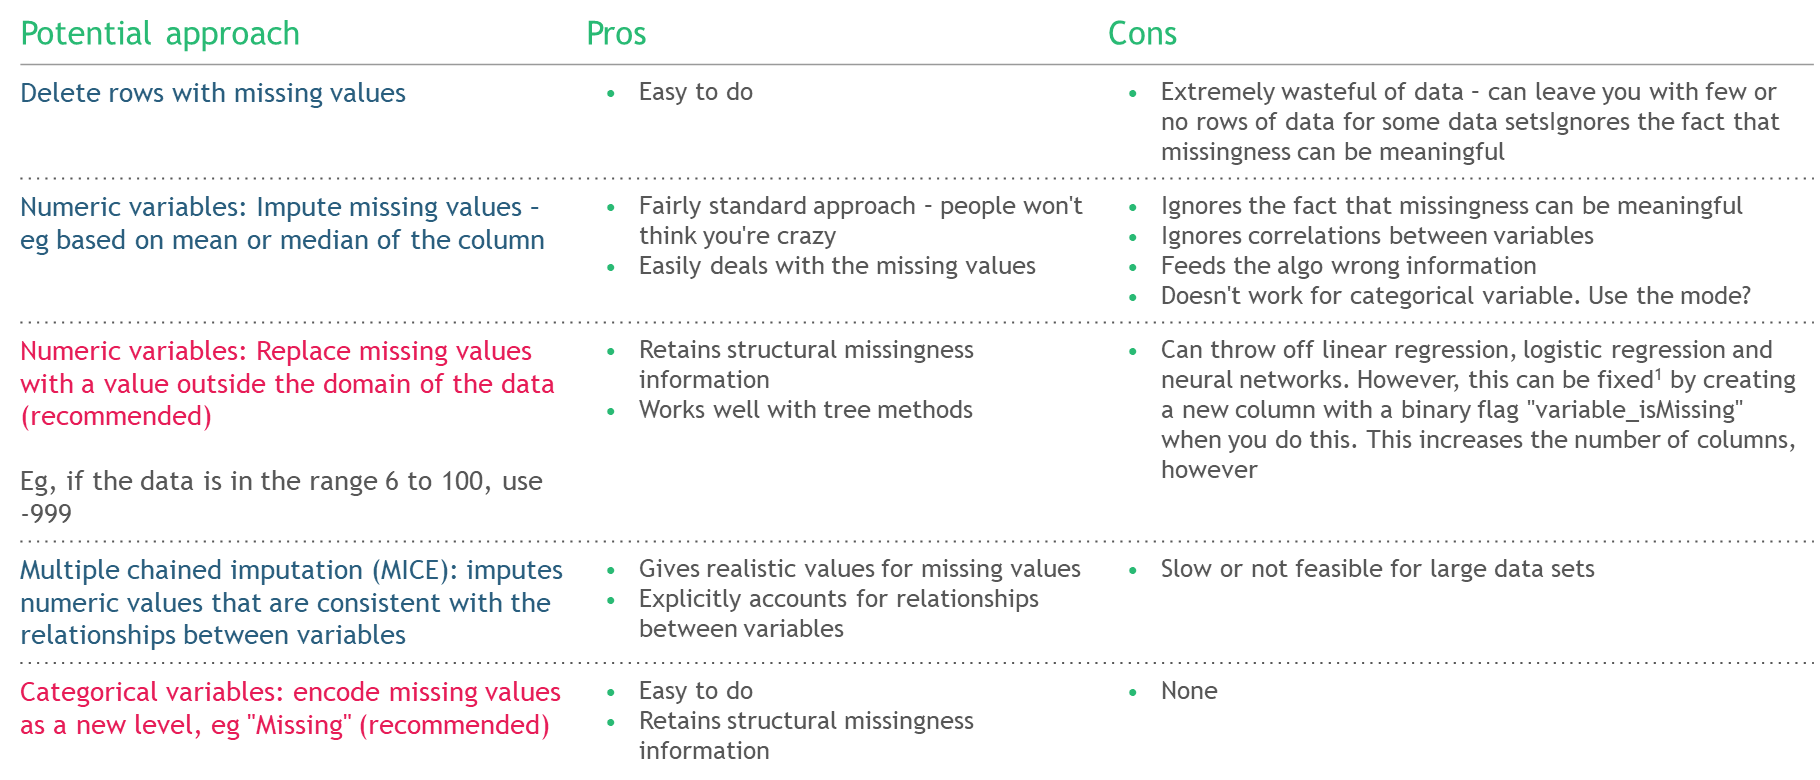

In [35]:
# View which columns have missing data
data.isnull().sum()

Unnamed: 0                                                       0
Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                  2
NYC Borough, Block and Lot (BBL) self-reported                   2
NYC Building Identification Number (BIN)                       107
Address 1 (self-reported)                                        0
Postal Code                                                      0
Street Number                                                   42
Street Name                                                     40
Borough                                                         37
DOF Gross Floor Area                                          

### Example:  `Weather Normalized Site Electricity (kWh)` column

In [36]:
col_name = 'Weather Normalized Site Electricity (kWh)'

In [37]:
min(data[col_name].values)

0.0

In [38]:
max(data[col_name].values)

110916652.2

#### Method 1 - Delete rows where value is missing

In [39]:
data_delete = data.dropna(subset=col_name)

In [40]:
# Confirm rows with missing values have been deleted
data_delete[col_name].isnull().sum()

0

#### Method 2 - Mean imputation

In [41]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

data_imp = data.copy()

data_imp[col_name] = data_imp[col_name].fillna(data_imp[col_name].mean())

In [42]:
# Confirm missing values have been imputed
data_imp[col_name].isnull().sum()

0

#### Method 3 - Replace missing values with number outside domain

In [43]:
data_replace = data.copy()

data_replace[col_name] = data_replace[col_name].fillna(-9999)

In [44]:
# Confirm missing values have been replaced
data_replace[col_name].isnull().sum()

0

___

<a name="1.10"></a>
## 1.10 Case example: Personalisation for an airline

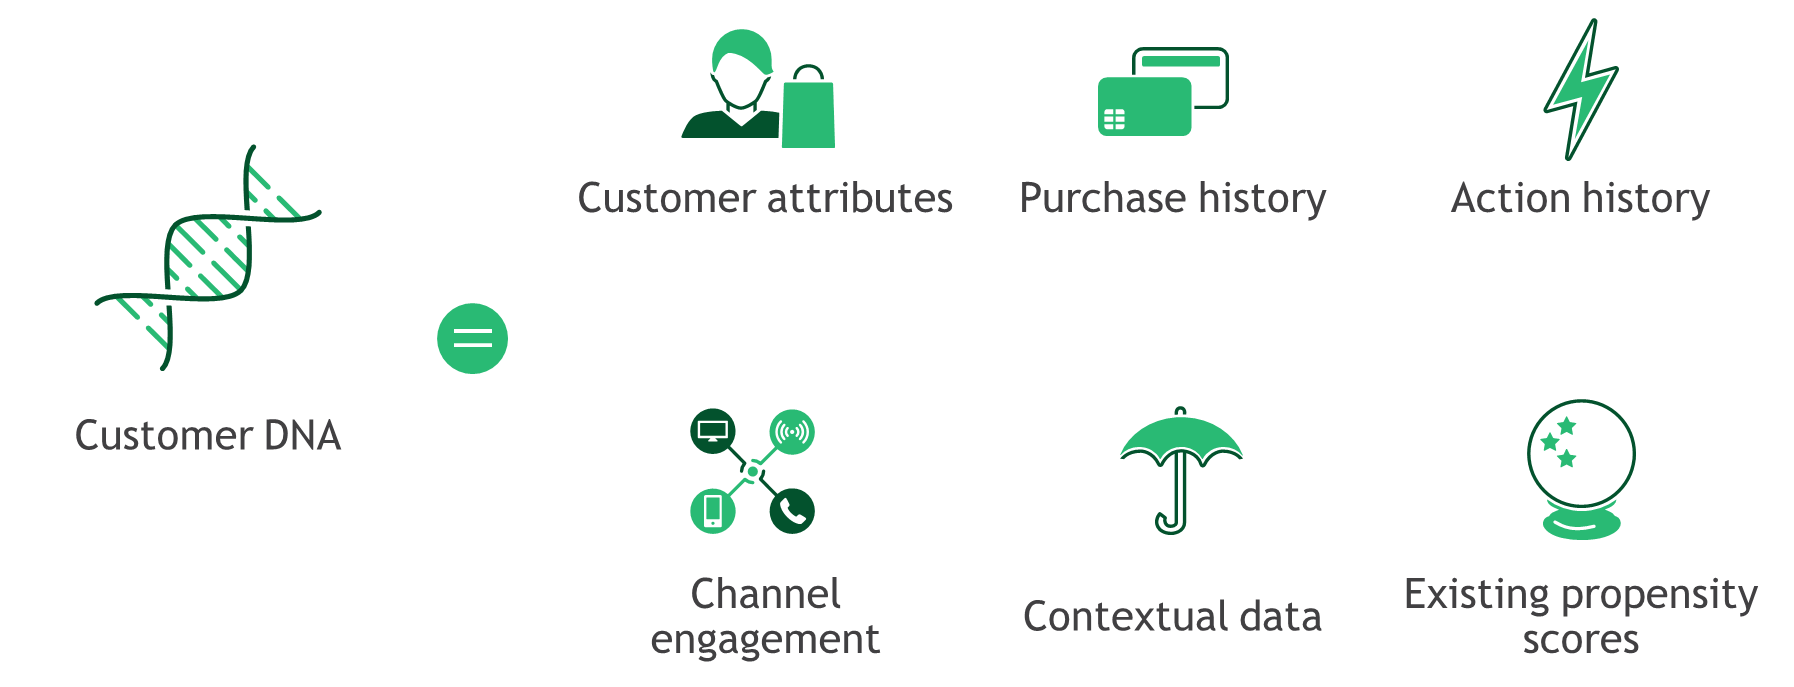

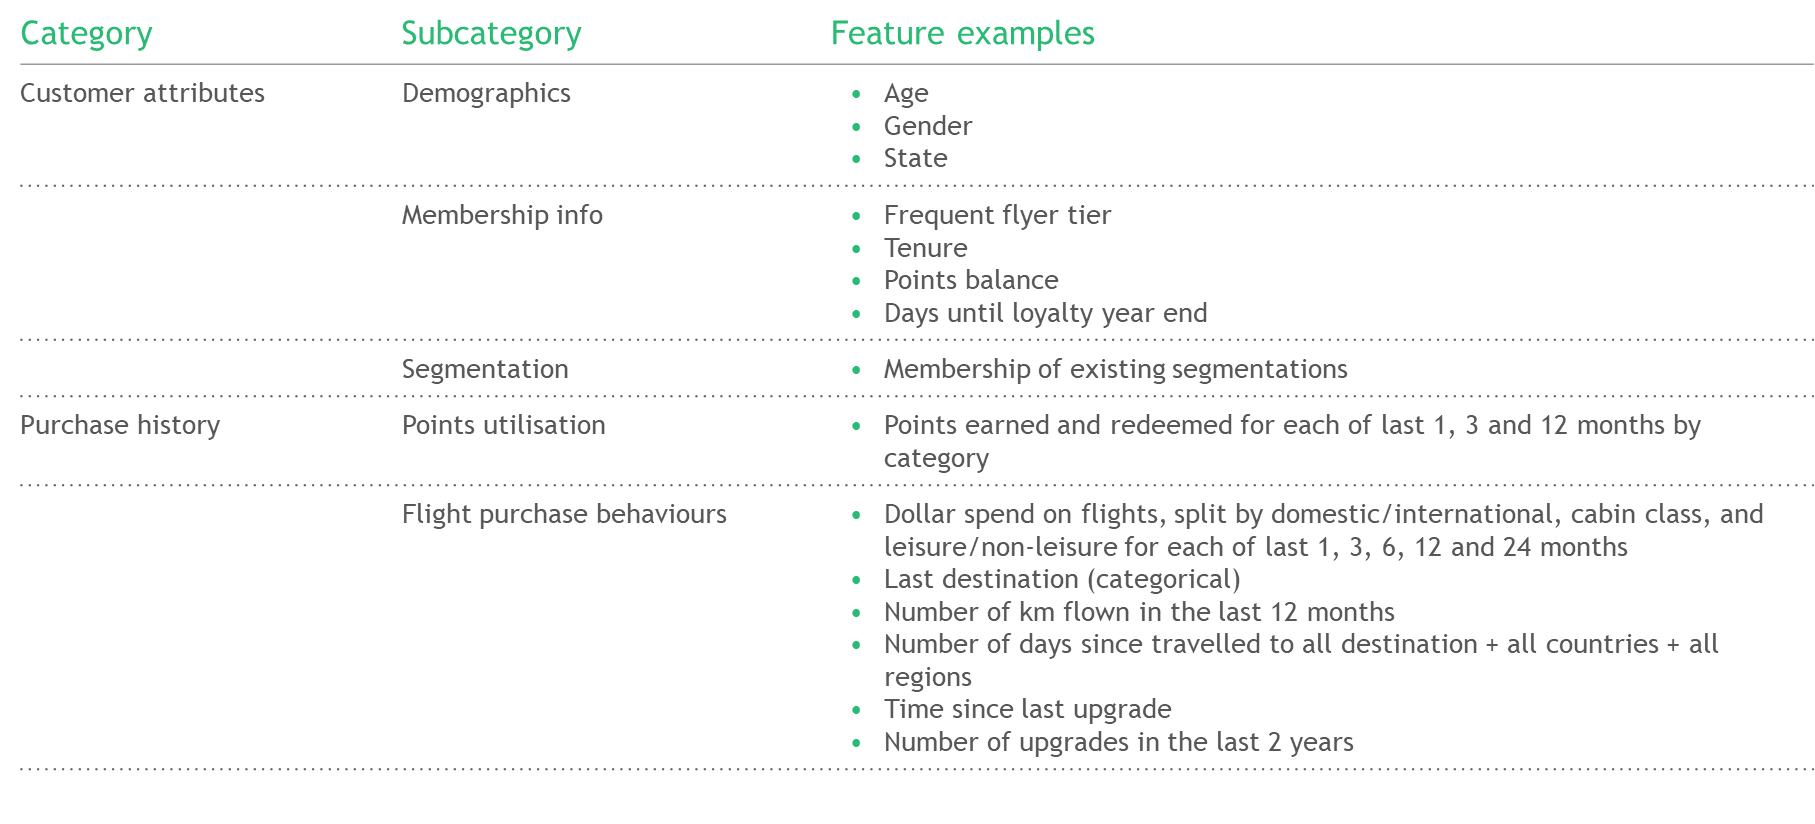

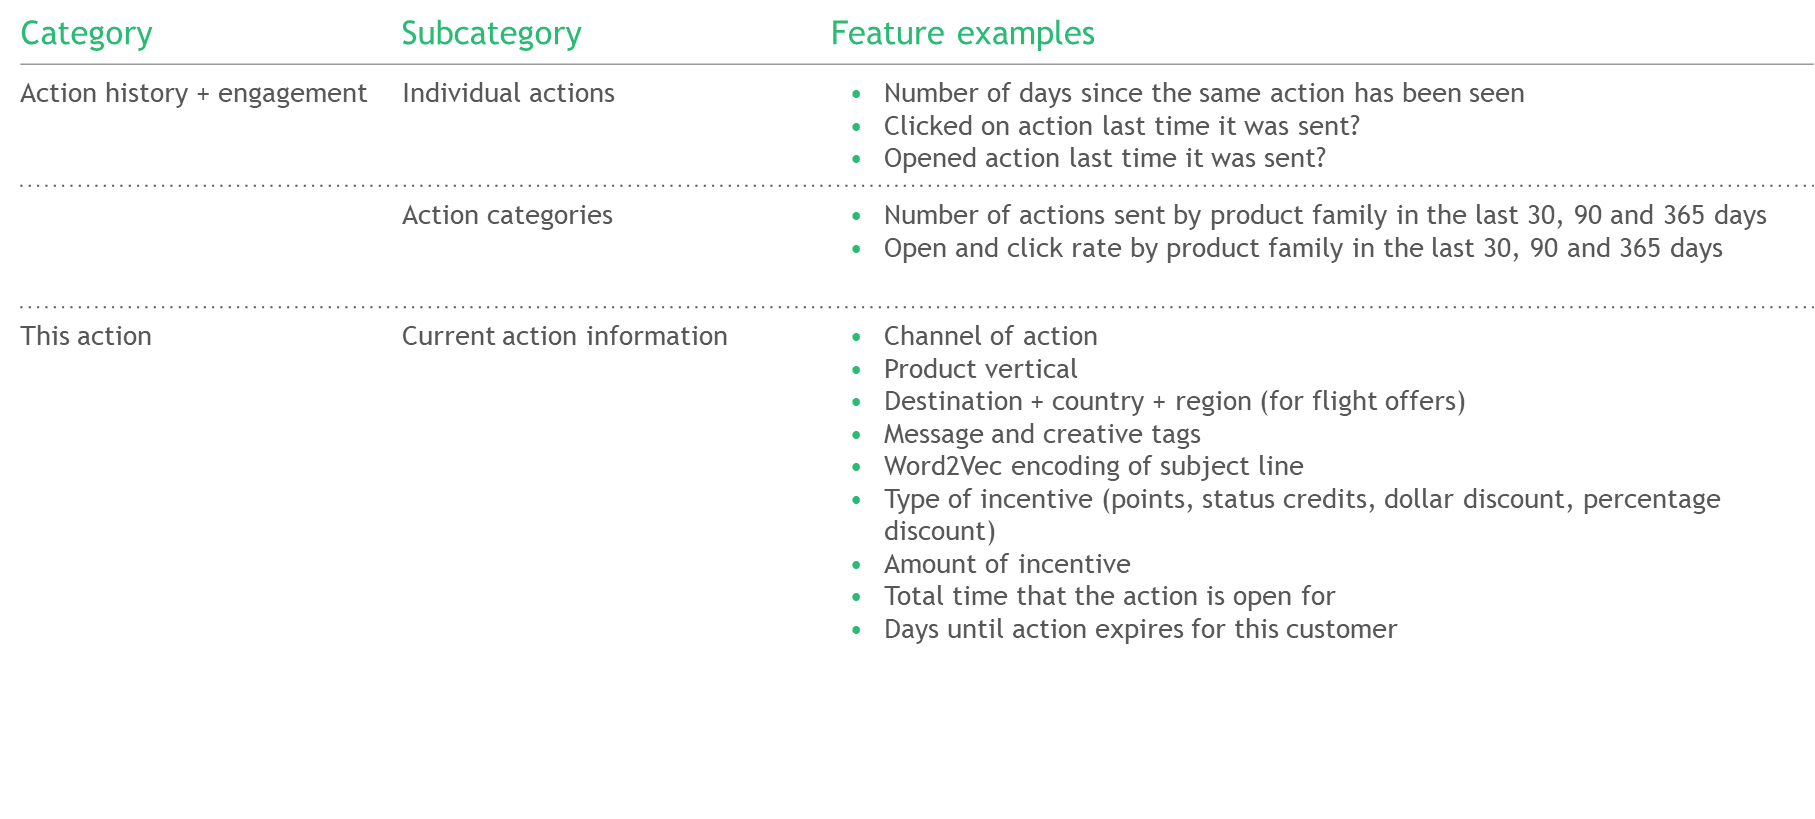

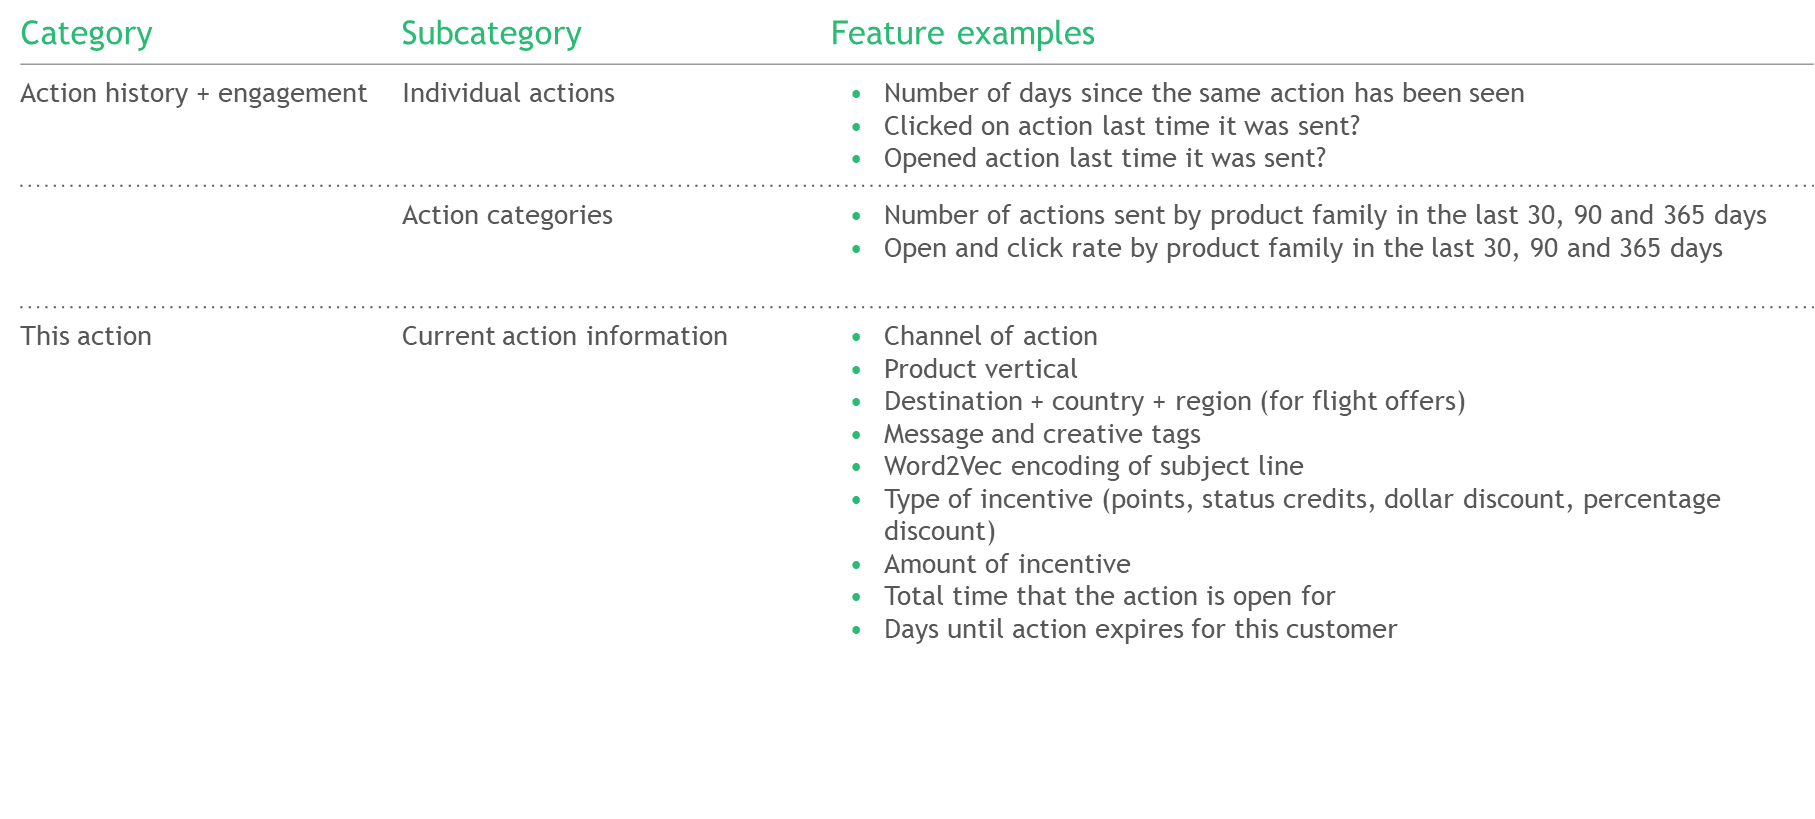
___

<a name="2"></a>
# 2. Feature Selection

__What is it?__

- Feature Selection is the process where you automatically or manually select those features which contribute the most to your output variable in which we are interested in.


__Why is it important?__

- Machine learning works on a simple rule – if you put garbage in, you will only get garbage to come out. By garbage here, we mean noise in data. 
- It is important to remember that not all original or engineered features contain predictive information. Hence, there is a need to appropriately select predictors for modelling
- In general, predictive performance is degraded as the number of uninformative predictors increases.
- Even when a predictive model is less sensitive to extra predictive features, it makes good scientific sense to include the minimum possible set that provides acceptable results.
- In some cases, removing predictors can reduce cost of acquiring data or improve throughput of the software used to make predictions.
- Overall, the goal of feature selection is to reduce the number of predictors as far as possible without compromising predictive performance
- Feature selection becomes even more important when the number of features are very large. You need not use every feature at your disposal for creating an algorithm. You can assist your algorithm by feeding in only those features that are really important.

    * It enables the machine learning algorithm to train faster.
    * It reduces the complexity of a model and makes it easier to interpret.
    * It improves the accuracy of a model if the right subset is chosen.
    * It reduces overfitting


- The need for feature selection can be examined by understanding the curse of dimensionality. The curse of dimensionality can affect any models built, with the drawbacks provided below:

    - High processing power required for data/ Slower training
    - Data points are more spread out which may lead to overfitting
    - Since data points are spread out, distances between them may look the same and lead to poor model performance.


- In short, the main benefits of feature selection are
    - Simplification: reduce features, increase transparency
    - Redundancy: reduce costs, increase stability


- There are **two** categories of feature selection: 
    1. Unsupervised
    2. Supervised
___

<a name="2.1"></a>
## 2.1 Unsupervised Feature Selection

- For unsupervised feature selection, the features-target variable (i.e. X to y) relationship is not considered. 
- It removes the redundant features, which means looking for correlation. 
- When you have two features or more than two features that are highly correlated, you really only need one of those, and you're going to select just the one that will probably give you the best result.
- The direct way to do this is to examine the correlation amongst features, and keep only one of the feature amongst the features that share high correlation with one another

In [45]:
numeric_subset = data.select_dtypes('number')

# Remove y variable (score)
numeric_subset_X = numeric_subset.drop(columns=['score'])

corr = numeric_subset_X.corr()
corr

,Unnamed: 0,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,Borough_ie,Borough_fe
Unnamed: 0,1.000000,0.997002,0.068582,-0.163147,-0.153921,0.137841,0.072452,0.069813,0.000953,0.014125,-0.401537,0.370642,-0.248382,0.022240,0.024375,-0.254617,-0.254675,-0.198028,0.003555,-0.244480,-0.163964,-0.022309,0.008456,-0.253212,-0.310310,0.308263,0.527104,0.852702,0.235886,0.694418,-0.797399
Order,0.997002,1.000000,0.068819,-0.159925,-0.151044,0.139938,0.073782,0.067765,-0.001435,0.011990,-0.395098,0.373093,-0.245679,0.024087,0.026308,-0.250215,-0.250269,-0.195062,0.003815,-0.241007,-0.160918,-0.021772,0.008447,-0.250750,-0.346449,0.281448,0.526042,0.871629,0.238062,0.712774,-0.801476
Property Id,0.068582,0.068819,1.000000,-0.091639,-0.081034,0.063262,-0.004924,-0.120176,-0.045446,-0.033567,-0.058029,0.029354,-0.065499,0.006222,0.008305,-0.141349,-0.142429,-0.121423,0.000617,-0.148532,-0.088991,0.000609,0.007500,-0.071782,0.036375,0.087006,-0.015841,0.051171,0.017990,0.041693,-0.114660
DOF Gross Floor Area,-0.163147,-0.159925,-0.091639,1.000000,0.943933,0.123271,0.072642,-0.047932,0.024276,0.012186,0.211105,-0.072169,0.138801,0.563660,0.551092,0.657880,0.675586,0.798097,0.521126,0.645454,0.947860,0.089409,-0.014644,0.137331,-0.013236,-0.089706,-0.123312,-0.131245,-0.016983,-0.078599,0.136409
Largest Property Use Type - Gross Floor Area (ft²),-0.153921,-0.151044,-0.081034,0.943933,1.000000,0.113843,0.082423,-0.051795,0.020428,0.007472,0.182876,-0.063548,0.117474,0.582805,0.579194,0.665887,0.662638,0.824050,0.548832,0.655791,0.996432,0.084453,-0.016089,0.125688,-0.016996,-0.096541,-0.120122,-0.132423,-0.018517,-0.080722,0.126582
Year Built,0.137841,0.139938,0.063262,0.123271,0.113843,1.000000,0.019013,-0.005568,-0.019826,-0.030680,0.101767,0.070739,0.050516,0.097642,0.102702,0.115423,0.115931,0.114683,0.053550,0.106388,0.115088,0.050715,0.010547,0.055652,-0.096615,-0.000326,-0.055974,0.103005,0.003601,0.127697,-0.135469
Number of Buildings - Self-reported,0.072452,0.073782,-0.004924,0.072642,0.082423,0.019013,1.000000,0.006994,0.020983,0.025067,-0.026004,0.065572,-0.002697,0.103812,0.111163,0.014588,0.013611,0.068297,0.096100,0.022302,0.079321,0.003131,-0.001977,-0.006174,-0.036322,0.009690,0.020494,0.041926,0.013427,0.052024,-0.056197
Occupancy,0.069813,0.067765,-0.120176,-0.047932,-0.051795,-0.005568,0.006994,1.000000,0.063415,0.054007,-0.092605,0.079062,-0.036446,0.009686,0.012141,-0.083880,-0.089263,-0.053323,0.023364,-0.082480,-0.054533,-0.064908,-0.044937,-0.018541,0.024072,0.084754,0.092730,0.056435,0.034461,0.013926,-0.057918
Site EUI (kBtu/ft²),0.000953,-0.001435,-0.045446,0.024276,0.020428,-0.019826,0.020983,0.063415,1.000000,0.996390,0.336064,0.490224,0.807120,0.183896,0.185069,0.127258,0.127783,0.221994,0.219225,0.130746,0.024531,0.014998,0.009457,0.794325,0.052271,0.033216,0.015951,-0.043094,0.018329,-0.057309,0.007890
Weather Normalized Site EUI (kBtu/ft²),0.014125,0.011990,-0.033567,0.012186,0.007472,-0.030680,0.025067,0.054007,0.996390,1.000000,0.308118,0.503931,0.788147,0.174247,0.177274,0.109360,0.108663,0.204245,0.211822,0.113013,0.010997,0.019481,0.022265,0.768900,0.050822,0.039435,0.020190,-0.034205,0.025108,-0.048596,-0.008729


<AxesSubplot:>

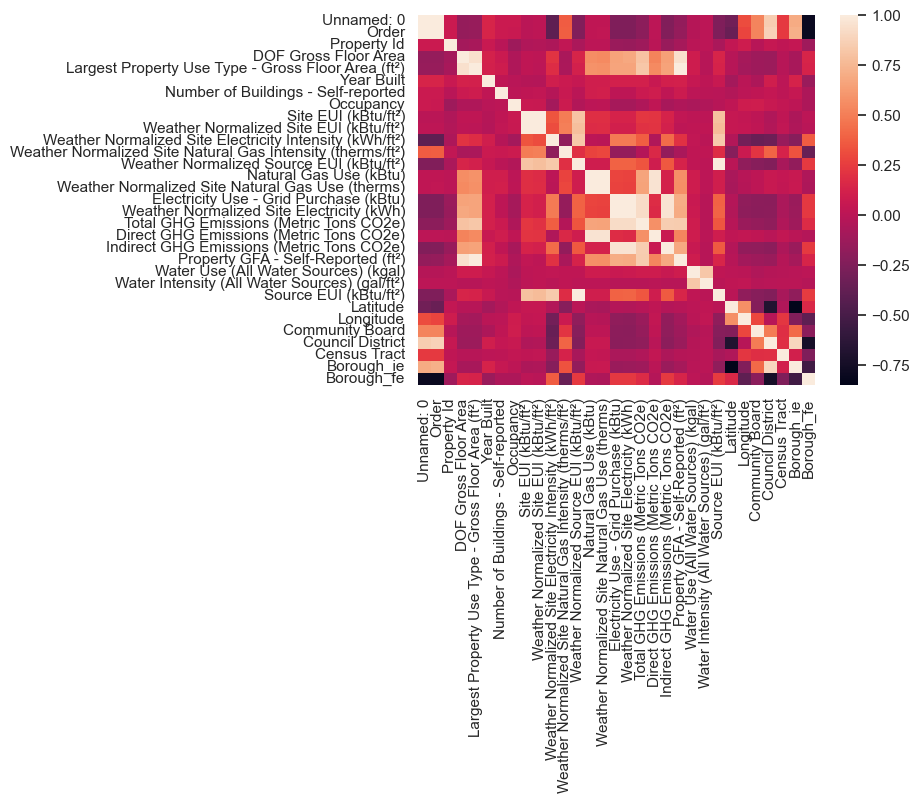

In [46]:
sns.set(font_scale=1)

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Let's zoom in on a highly correlated example

In [47]:
# Filter to index Total GHG
high_corr = corr.filter(like='Total GHG', axis=0)

high_corr

,Unnamed: 0,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,Borough_ie,Borough_fe
Total GHG Emissions (Metric Tons CO2e),-0.198028,-0.195062,-0.121423,0.798097,0.82405,0.114683,0.068297,-0.053323,0.221994,0.204245,0.373138,-0.030608,0.340292,0.661438,0.6596,0.923202,0.924276,1.0,0.5775,0.852893,0.841078,0.08826,-0.014038,0.346906,-0.016712,-0.140854,-0.158053,-0.180668,-0.042275,-0.113796,0.174457


In [48]:
# Keep only several columns for demo
high_corr_2 = high_corr[['Electricity Use - Grid Purchase (kBtu)', 'Weather Normalized Site Electricity (kWh)']]

high_corr_2

,Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh)
Total GHG Emissions (Metric Tons CO2e),0.923202,0.924276


- We can see from the above that Total GHG emissions is highly correlated with electricity use and weather normalized site electricty (since the values are >0.9, which is close to 1).
- Recall that a correlation of 1 means perfect correlation
- With this information, we can choose to only retain one of these features

Supervised feature selection is more commonly used than unsupervised feature selection, and is explained in the following section

<a name="2.2"></a>
## 2.2 Supervised Feature Selection

- For supervised feature selection, it involves the use the relationship between features (X) and target variable (y) i.e. look at the relationship between each of the features and the target label, and removes irrelevant variables
- This strategy is unlike unsupervised method, where only correlation between features is taken into account
- The **supervised** feature selection methods can be categorized as follows:
    1. Filter Methods
    2. Wrapper Methods
    3. Embedded Methods

<img src="./Images/supervised_feature_selection.png" width="560" align="center"/>

<a name="2.2.1"></a>
### 2.2.1 Filter Selection Methods

- Filter feature selection methods employ statistical techniques to determine how the different input features relate to the target variable. 
- They return a score or metric that can be used to select (filter) features that will be used in the model
- Using the scores, the predictors are ranked and filtered with either a threshold or by taking the top p predictors.
- The goal is to select those features that have the strongest relationship with the target variable.
- Can be further categorized into 
    - Correlation 
    - Univariate feature selection
- Examples of filter selection methods include Fisher score, information gain, and the following correlation coefficients:
    - Pearson’s Correlation Coefficient
    - ANOVA
    - Chi-Squared
    - Mutual Information
    - Kendall’s tau (kendalltau)
    - Spearman’s rank correlation (spearmanr)

### (i) Correlation

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.<br>

✍️ __For example__, height and weight are related; taller people tend to be heavier than shorter people. The relationship isn't perfect. People of the same height vary in weight, and you can easily think of two people you know where the shorter one is heavier than the taller one. Nonetheless, the average weight of people 5'5'' is less than the average weight of people 5'6'', and their average weight is less than that of people 5'7'', etc. 

Correlation can tell you just how much of the variation in peoples' weights is related to their heights.


**Correlation between two continuous variables**

__Pearson correlation method__: In order to quantify correlations between the features (variables) and the target, we can calculate the Pearson correlation coefficient. This is a measure of the strength and direction of a linear relationship between two variables: a value of -1 means the two variables are perfectly negatively linearly correlated and a value of +1 means the two variables are perfectly positively linearly correlated.<br>
Since dependent variables in this problem is a continuous variable, we can check for correlation between all continuous independent variables and the dependent variable using pearson correlation method.

__Find correlation between features and the target__

[df.corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)

In [49]:
correlations_data = data.corr()['score'].sort_values()

print(correlations_data.head(15), '\n')

print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.741160
Weather Normalized Site EUI (kBtu/ft²)                       -0.729003
Weather Normalized Source EUI (kBtu/ft²)                     -0.667074
Source EUI (kBtu/ft²)                                        -0.665194
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.364051
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.340519
Direct GHG Emissions (Metric Tons CO2e)                      -0.148722
Weather Normalized Site Natural Gas Use (therms)             -0.134742
Natural Gas Use (kBtu)                                       -0.133584
Year Built                                                   -0.123116
Total GHG Emissions (Metric Tons CO2e)                       -0.115037
Latitude                                                     -0.053016
Electricity Use - Grid Purchase (kBtu)                       -0.052491
Weather Normalized Site Electricity (kWh)                    -0.050267
Proper

<mark>__Observations:__ There are several strong negative correlations between the features and the target<mark>
* <mark>The most negative correlations with the score are the different categories of Energy Use Intensity (EUI), Site EUI (kBtu/ft²) and  Weather Normalized Site EUI (kBtu/ft²) (these vary slightly in how they are calculated)<mark>
* <mark>The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better. Intuitively, these correlations then make sense: as the EUI increases, the Energy Star Score tends to decrease<mark>

We can also visually identify correlation between two continuous variables by drawing pearson correlation matrix. 

In [50]:
data.columns

Index(['Unnamed: 0', 'Order', 'Property Id', 'Property Name',
       'Parent Property Id', 'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather N

In [51]:
#selecting only a subset of continuous columns from the main data set so that it is easier to visualize the correlation
data_corr = data.loc[:, ['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)', 
                         'Weather Normalized Site Electricity Intensity (kWh/ft²)', 'Water Intensity (All Water Sources) (gal/ft²)'
                         , 'Community Board', 'Census Tract']]

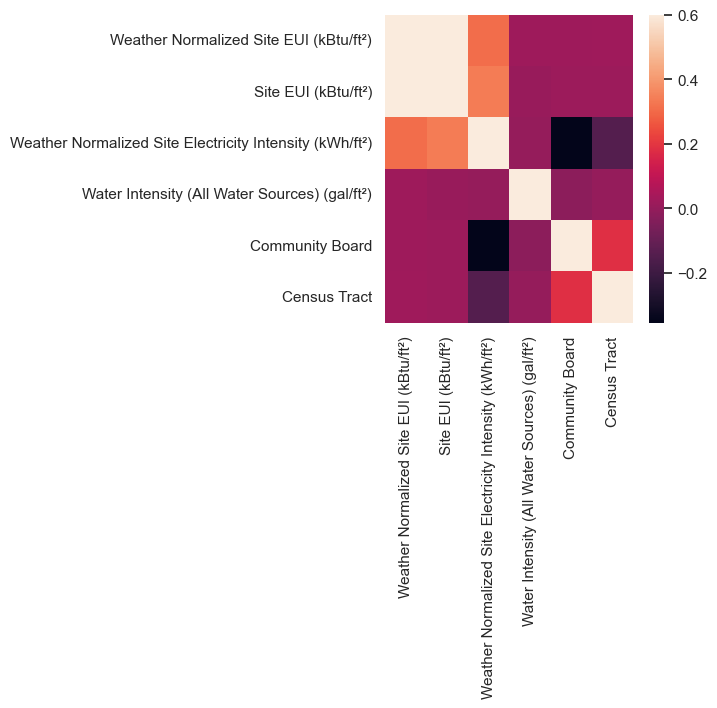

In [52]:
#correlation matrix
corrmat = data_corr.corr()
f, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(corrmat, vmax=.6, square=False);

<mark>__Observation__<mark>

* <mark>Weather Normalized Site EUI (kBtu/ft²) & Site EUI (kBtu/ft²) seems much correlated.<mark>
* <mark>If two variables are highly correlated i.e. correlation score > 0.8 then it makes sense to keep only one variable out of the two as both the variables are providing almost the same information<mark>

### (ii) Univariate feature selection

**(i) ANOVA F**

- Analysis of variance (ANOVA) is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA checks the impact of one or more factors by comparing the means of different samples.<br>
- The method can help us understand the relationship between the dependent variables and a continuous independent variable.

In [53]:
#code implementation of ANOVA test
results = ols('score ~ Borough', data = data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     13.15
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           1.12e-10
Time:                        13:30:32   Log-Likelihood:                -42873.
No. Observations:                8942   AIC:                         8.576e+04
Df Residuals:                    8937   BIC:                         8.579e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   58.4382      0.732     79.791      0.000      57.003      59.874
Borough[T.Brooklyn]          5.6763      1.004      5.655      0.000       3.709       7.644
Borough[T.Manhattan]         0.8079      0.871      0.927      0.354      -0.900       2.516
Borough[T.Queens]            4.4341      1.035      4.283      0.000       2.405       6.463
Borough[T.Staten Island]     2.8284      3.169      0.893      0.372      -3.384       9.040
==============================================================================
Omnibus:                     1553.727   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              618.256
Skew:                          -0.457   Prob(JB):                    5.59e-135
Kurtosis:                       2.092   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<mark>__Observation__<mark>

<mark>As p value came out to be less than 0.05, we can say that there is a significant relationship between these two variables<mark>

We can also use functions from the sklearn library on the dummy dataset:

In [54]:
from sklearn.feature_selection import f_classif, f_regression

data_demo = data.dropna() # Remove null values for f_regression to work

numeric_demo_X = data_demo.select_dtypes('number').drop(columns='score')
y_demo = data_demo['score']

stats, p_value = f_regression(numeric_demo_X.dropna(), y_demo)
print(stats, p_value)

[9.51780207e+00 1.04137689e+01 4.02517690e+01 3.59794986e+00
 1.10931653e-01 8.47759003e+01 1.32611121e+00 2.82729981e-01
 3.02102122e+03 2.90041487e+03 3.93459690e+02 3.36038343e+02
 1.86413550e+03 1.42998269e+02 1.43535546e+02 7.83077632e+00
 7.59644447e+00 3.22357892e+01 1.78367655e+02 4.01762635e+00
 1.22454271e-01 3.76473277e+00 1.94476006e+00 1.78152042e+03
 1.31381788e+00 1.72834321e-02 1.52738725e+01 9.36544785e+00
 1.06206612e-04 7.82664457e+00 4.55794204e+00] [2.05459468e-003 1.26509834e-003 2.59159652e-010 5.79528522e-002
 7.39110678e-001 6.32938795e-020 2.49595736e-001 5.94959286e-001
 0.00000000e+000 0.00000000e+000 4.42473286e-082 5.23015243e-071
 3.70667457e-313 3.47673241e-032 2.68765808e-032 5.17126458e-003
 5.88592660e-003 1.50451896e-008 1.69630683e-039 4.51223904e-002
 7.26413834e-001 5.24436766e-002 1.63262353e-001 2.99308102e-302
 2.51801716e-001 8.95415679e-001 9.51791163e-005 2.23193436e-003
 9.91778147e-001 5.18306586e-003 3.28522957e-002]


`stats` here are F-scores associated with the features while `p_value` (as the name suggests), p-values associated with the features where the following hypothesis is tested:

$H_0:$ The current feature and output are independent

$H_1:$ The current feature and output are not independent (i.e. are dependent)

As expected, the F-score is the highest (and the p-value lowest) for the second feature, and is followed by the third feature. The first feature has a significatly lower f-score and significantly higher p-value since it doesn't help determine the output.

**(ii) Chi Squared Test**

The Chi-Square test of independence is used to determine if there is a significant relationship between two nominal (categorical) variables. The frequency of each category for one nominal variable is compared across the categories of the second nominal variable.<br>

_What is a contingency table?_

A contingency table, sometimes called a two-way frequency table, is a tabular mechanism with at least two rows and two columns used in statistics to present categorical data in terms of frequency counts.

This is what a contingency table looks like-

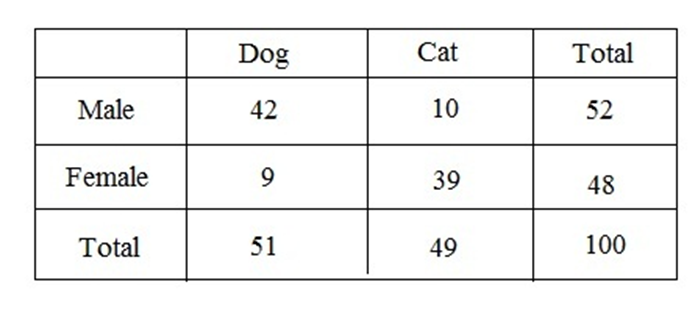

In [55]:
#code implementation of chi square test
contingency_table = pd.crosstab(data['Largest Property Use Type'], data['Borough'])

#extracting basic statistics from the chi square output
stat, p, dof, expected = chi2_contingency(contingency_table)

print('probability=%.3f, stat=%.3f' % (p, stat))

probability=0.000, stat=1233.471


<mark>__Observation__<mark>

<mark>As p value came out to be less than 0.05, we can say that there is a significant relationship between these two categorical variables<mark>

To do feature selection using chi-squared test, we can use the `SelectKBest` function from sklearn.

The code to get the 5 best features based on chi-squared test is:

In [56]:
from sklearn.feature_selection import SelectKBest, chi2

In [57]:
categorical_subset = data.select_dtypes('object').dropna()

In [58]:
categorical_subset.head()

,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
21,"Towers 2,3",3614737,Columbia University Medical Center,1021390250,1021390250,1088757,100 Haven Avenue,10032,100,HAVEN AVENUE,Manhattan,Office,"Office, Other, Residence Hall/Dormitory",Office,Whole Building,Whole Building,05/02/2017 01:28:02 PM,No,In Compliance,Washington Heights South ...
22,154 Haven Dormitory,3614737,Columbia University Medical Center,1021390275,1021390275,1063430,154 Haven Avenue,10032,154,HAVEN AVENUE,Manhattan,Office,"Office, Other, Residence Hall/Dormitory",Office,Whole Building,Whole Building,05/02/2017 01:28:02 PM,No,In Compliance,Washington Heights South ...
23,"Silver Tower 1,2&Garage",3616399,New York University: Washington Square,1005240066,1005240066,1008243,110 Bleeker Street,10012,100,BLEECKER STREET,Manhattan,Multifamily Housing,"Multifamily Housing, Parking",Multifamily Housing,Another configuration,Whole Building,04/28/2017 07:15:52 PM,Yes,In Compliance,West Village ...
24,1 Washington Square Village,3616399,New York University: Washington Square,1005330001,1005330001,1077833,1 Washington Square Village,10012,1,WASHINGTON SQ VLLGE,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Whole Building,Whole Building,04/28/2017 07:15:52 PM,No,In Compliance,West Village ...
31,434 West 120th Street,3618216,435 W 119 and 434 W 120,1019620070,1019620070,1059514,434 West 120th Street,10027,1211,AMSTERDAM AVENUE,Manhattan,Multifamily Housing,Multifamily Housing,Multifamily Housing,Whole Building,Whole Building,04/24/2017 06:52:20 PM,Yes,In Compliance,Morningside Heights ...


In [59]:
y_demo_2 = categorical_subset[['Water Required?']] # Get categorical output variable
categorical_subset_X = categorical_subset.drop(columns=['Water Required?']) # Keep categorical input variables

categorical_subset_dummies = pd.get_dummies(categorical_subset_X) # Convert input variables to dummies

In [60]:
# Initiate selector object (aim to select best 3 features based on chi-square test)
selector = SelectKBest(chi2, k=3)

X_new = selector.fit_transform(categorical_subset_dummies, y_demo_2)

In [61]:
feature_idx = selector.get_support()
feature_names = categorical_subset_dummies.columns[feature_idx]

In [62]:
feature_names

Index(['Primary Property Type - Self Selected_Office',
       'Largest Property Use Type_Office',
       'NTA_Midtown-Midtown South                                                      '],
      dtype='object')

From the above, we can see which are the top 3 features based on chi-squared test

**(iii) Mutual Information** 

Mutual information uses information theory to gauge the dependence between the independent and dependent variables

In [63]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

info = mutual_info_regression(numeric_demo_X, y_demo)
print(info)

[0.0667295  0.07290675 0.04857731 0.01841392 0.01921825 0.05835459
 0.00393263 0.         0.51696052 0.48946912 0.21349551 0.15078363
 0.7412186  0.05103896 0.05947613 0.08063849 0.06638586 0.19237898
 0.10244221 0.08107384 0.00829417 0.03267495 0.03042403 0.7713528
 0.04882415 0.01713426 0.0276807  0.06037107 0.02785389 0.00593161
 0.0118762 ]


### Pros and Cons of Filter Methods
**Pros**
- Simple and tends to be fast
- Effective at capturing the large trends (i.e. individual predictor-outcome relationship) 

**Cons**
- Prone to over-selecting predictors (still not selecting the truly essential predictors)
- Disconnect between the objective function for the filter method (e.g., statistical significance) and what the model requires (predictive performance). In other words, a feature need not be statistically dependent on the target to be useful in improving predictive performance.
- Very susceptible to finding predictors that have strong associations in the available data but do not show any association with new data.
- Misses out on key interactions between features. Layman analogy: To predict GPS coordinates, the feature of house number is useless without the feature of street name
- Inherently unable to detect and remove redundant features. To detect redundant features, an approach needs to consider more than one feature at a time.


___
<a name="2.2.2"></a>
### 2.2.2 Wrapper Methods
- Wrapper methods evaluate multiple models using procedures that add and/or remove predictors (i.e. create many models with different subsets of input features) to find the optimal feature combination that maximizes model performance.
- These methods build numerous models based on the same model methodology but with different subset of input features to determine the best performing model based on a pre-selected metric
- These methods work with different variable types
- They can be computationally expensive as they involve building multiple models
- Examples include recursive feature elimination, sequential feature selection algorithms and genetic algorithms 


**(i) Recursive Feature Elimination**

- This method relies on the model returning some information on feature importances. For linear and logisitic regression, this would be the coefficients if the input data is appropriately scaled.
- RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.
- It can be combined with any model to identify a good subset of features with optimal performance for the model of interest. The primary drawback is that it requires that the initial model be able to fit the entire set of predictors
- This method starts with the initial set of features and recursively removes the least important feature.

💬 **Chat Discussion**

<details><summary> <b>Why does the method recursively eliminate as opposed to eliminating all the least important features at once</b></summary>

Some correlations and dependencies may not be reflected in the feature importances appropriately which is why it is better to employ recursive elimination.

We can explore how RFE works by applying it on the dummy dataset:

In [64]:
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=2)
rfe.fit(numeric_demo_X, y_demo)

rfe.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False])

<mark> As expected, the first feature (`Unnamed: 0`) is excluded since it doesn't help determine the output </mark>

We then map the boolean support as feature indexes back to the column names, so that we can get the names of the selected features

In [65]:
feature_idx = rfe.get_support()
features_names = numeric_demo_X.columns[feature_idx]
features_names

Index(['Latitude', 'Longitude'], dtype='object')

**(ii) Sequential Feature Selection**

This method progressively adds or removes features to build out the model, using either forward or backward selection:
- Forward Selection: The model starts with an empty set of features and progressively adds features
- Backward Selection: The model starts with the full set of features and removes features progressively

Unlike RFE, SFS uses the cross-validation score associated with the chosen model and subset of features to add or remove features.

SFS can also be used on the dummy dataset to find which features are relevant:

In [66]:
from sklearn.feature_selection import SequentialFeatureSelector

lm = LinearRegression()
sfs = SequentialFeatureSelector(lm, n_features_to_select=2)
sfs.fit(numeric_demo_X, y_demo)

sfs.get_support()

array([False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [67]:
feature_idx = sfs.get_support()
features_names = numeric_demo_X.columns[feature_idx]
features_names

Index(['Year Built', 'Site EUI (kBtu/ft²)'], dtype='object')

<mark> Similar to RFE, the first feature is excluded since it doesn't help determine the output </mark>

### Pros and Cons of Wrapper Methods
#### Pros
- Have the most potential of finding the best predictor subset (if it exists), because they search a wider variety of predictor subsets compared to filter and intrinsic methods
- RFE is an approach that can be combined with any model to identify a good subset of features with optimal performance for the model of interest	

#### Cons
- High computational time required to find the optimal or near optimal subset. The additional time can be excessive to the extent of being counter-productive. 
- Have the most potential to overfit the predictors to training data and requires external validation
- Requires the initial model to be able to fit the entire set of predictors

___
<a name="2.2.3"></a>
### 2.2.3 Embedded Methods

- Embedded (aka intrinsic) methods are models where the feature selection procedure occurs naturally in the course of the model fitting process.
- Unlike the previous methods, embedded methods are not model agnostic and are tied to the model being used.
- Embedded methods combine the best of both worlds (filter and wrapper methods), as they are
  - Faster than wrapper methods (since wrapper methods are based on the greedy algorithm and solutions are slow to compute
  - More efficient than filter methods (since filter methods suffer from inefficiencies as they need to look at all the possible feature subsets)


- There are two categories of embedded methods:
  1. Feature importance: Certain algorithms (e.g. Random Forest) can be used to estimate the importance of features. These feature importance scores can be used to select features. This will be explored further in a later chapter.
  2. Regularization (L1): Weak features will have their X coefficients transformed to zero. This will be explored further in the next chapter.

### Pros and Cons of Embedded Methods
#### Pros
- Relatively fast since the selection process is embedded within the model fitting process
- Provides a direct connection between selecting features and the objective function  Makes it easier to make informed choices between feature sparsity and predictive performance
- No external feature selection tool is required

#### Cons
- Model-dependent. If the data are better fit by a non-intrinsic feature selection type of model, then predictive performance may be sub-optimal when all features are used.
- Some intrinsic models (like single tree models) use a greedy approach to feature selection. Greedy approaches usually identify a narrow set of features that have sub-optimal predictive performance.


___

<a name="2.3"></a>
## 2.3 Dimensionality Reduction

- Dimensionality is another way for feature selection e.g. PCA, which transforms the features into a reduced number of dimensions that preserve the greatest variance, or independent components analysis (ICA) which aims to find the independent sources in a set of features. 
- However, while these methods are effective at reducing the number of features, they create new features that have no physical meaning and hence make interpreting a model nearly impossible.

__What is Dimensionality reduction?__

Dimensionality reduction is a crucial step for accelerating model building without losing the potential predictive power of the data. It is one of the way to perform feature selection.

__Why is it important?__

It serves as a fundamental technique to identify those variables which are most efficient and effective for a given problem and features which are not able to explain the dependent variable are dropped.

__The Curse of Dimensionality__
- One of the problems with data is having too many features. 
- The phrase curse of dimensionality, attributed to Richard Bellman, was coined to express the difficulty of using brute force  to optimize a function with too many input variables.
- Existence of a large number of features or dimensions makes analysis computationally intensive and hard for performing machine learning tasks for pattern identification.
- Poses multiple challenges, as analysing and visualizing data with thousands of features makes the feature space sparse, causing problems with regard to training models, memory, and space constraints.
- If we have more features than observations than we run the risk of massively overfitting our model — this would generally result in terrible out of sample performance.
- As such, it is important to understand how dimensionality reduction can help us
___

__Common methods to perform Dimensionality Reduction__  
There are several different methods to reduce the dimensions of a dataset:


1. __Missing Values__: Drop the features if we have too many missing values. It has already been explained in this notebook above.


2. __Low Variance__: Drop features having low variance compared to others because these variables will not explain the variation in target variables.


3. __High Correlation__: Dimensions exhibiting higher correlation can lower down the performance of model. Moreover, it is not good to have multiple variables of similar information or variation also known as “Multicollinearity”. VIF (variance inflation factor) is used to detect mulitcollinearity. Variables having higher value ( VIF > 5 ) can be dropped.


4. __Factor Analysis__: Let’s say some features are highly correlated. These features can be grouped by their correlations i.e. all features in a particular group can be highly correlated among themselves but have low correlation with variables of other group(s). Here each group represents a single underlying construct or factor. These factors are small in number as compared to large number of dimensions. There are basically two methods of performing factor analysis:

    * EFA (Exploratory Factor Analysis)
    * CFA (Confirmatory Factor Analysis)


5. __Principal Component Analysis (PCA)__: In this technique, variables are transformed into a new set of variables, which are linear combination of original variables. These new set of variables are known as principle components. They are obtained in such a way that first principle component accounts for most of the possible variation of original data after which each succeeding component has the highest possible variance.  
The second principal component must be orthogonal to the first principal component. In other words, it does its best to capture the variance in the data that is not captured by the first principal component. For two-dimensional dataset, there can be only two principal components. Below is a snapshot of the data and its first and second principal components.

<img src="./Images/pca.png" width="560" align="center"/>

<a name="2.3.1"></a>
## 2.3.1 Principal Component Analysis (PCA)

__What is PCA?__

Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables. 
As an added benefit, each of the “new” variables after PCA are all independent of one another. This is a benefit because the assumptions of a linear model require our independent variables to be independent of one another. 
If we decide to fit a linear regression model with these “new” variables this assumption will necessarily be satisfied.

__Why it is used?__

It's often used to make data easy to explore and visualize as it reduces the number of dimensions in the data and keep only those which capture most of the variance in the dependent variable.

__When is it used?__

*  You want to reduce the number of variables, but aren’t able to identify variables to completely remove from consideration?
*  you want to ensure your variables are independent of one another?
* Are you comfortable making your independent variables less interpretable?

__How does PCA work?__

* We are going to calculate a matrix that summarizes how our variables all relate to one another. This is known as covariance matrix
* We’ll then break this matrix down into two separate components: direction and magnitude. We can then understand the “directions” of our data and its “magnitude” (or how “important” each direction is)
* The screenshot below displays the two main directions in this data: the “red direction” and the “green direction.” In this case, the “red direction” is the more important one. (Hint: What would fitting a line of best fit to this data look like?)

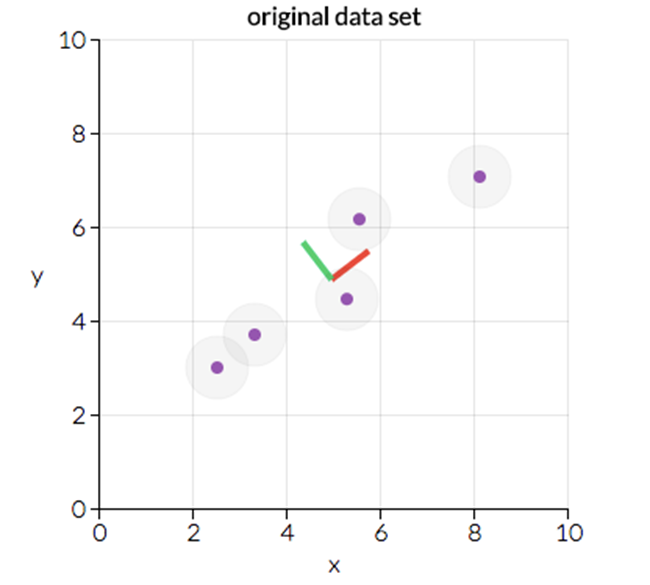

* We will transform our original data to align with these important directions (which are combinations of our original variables)
* The screenshot below is the same exact data as above, but transformed so that the x and y axes are now the “red direction” and “green direction

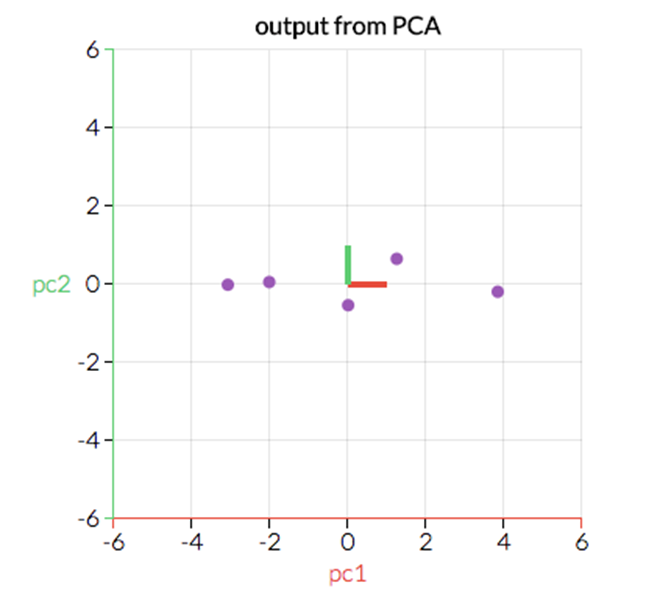

__Observations__

* While the visual example here is two-dimensional (and thus we have two “directions”), think about a case where our data has more dimensions. By identifying which “directions” are most “important,” we can compress or project our data into a smaller space by dropping the “directions” that are the “least important.”
* By projecting our data into a smaller space, we’re reducing the dimensionality of our feature space

__NOTE__
    
* The principal components are sensitive to the scale of measurement, now to fix this issue we should always standardize variables before applying PCA

In [68]:
scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(data.select_dtypes(np.number).dropna())

##### Below will return a numpy matrix which is scaled
data_X = scaler.transform(data.select_dtypes(np.number).dropna())

Do note that we are using X numpy matrix obtained from Scaling.

In [69]:
data_X.shape

(3870, 32)

Let's take a look at the explained variance of each principal component, capped at the maximum number of variables in the dataset.

In [70]:
#Explained variance
pca = PCA().fit(data_X)

exp_variance_df =  pd.DataFrame(list(zip(range(len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_.cumsum())))
exp_variance_df.rename(columns = {0: "Components",1:"Cum_Exp_Variance"}).head(15)

,Components,Cum_Exp_Variance
0,0,0.484515
1,1,0.637606
2,2,0.757980
3,3,0.809969
4,4,0.849947
5,5,0.880935
6,6,0.910424
7,7,0.929688
8,8,0.946091
9,9,0.961865


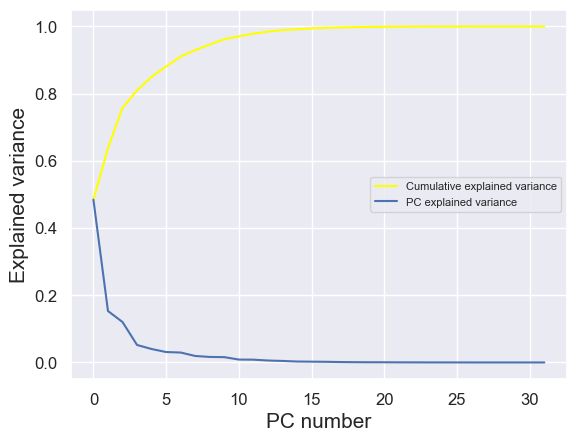

In [71]:
plt.plot(exp_variance_df.iloc[:,0], exp_variance_df.iloc[:,1], c="yellow", label="Cumulative explained variance")
plt.plot(pca.explained_variance_ratio_, label="PC explained variance")
plt.legend(loc="best", fontsize=8)
plt.xlabel('PC number', fontsize=15)
plt.ylabel('Explained variance', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

__Observation__

* Assuming the acceptable threshold of the cumulative explained variance is 95%, eight principal components are sufficient.
* The next step is to transform the dataset into eight principal components.

In [72]:
pca2 = PCA(n_components=8)
pca2.fit(data_X)
data_X_pca2 = pca2.transform(data_X)
print("original shape:   ", data_X.shape)
print("transformed shape:", data_X_pca2.shape)

original shape:    (3870, 32)
transformed shape: (3870, 8)


In [73]:
pd.DataFrame(data_X_pca2)

,0,1,2,3,4,5,6,7
0,-0.636601,-0.676650,-0.314044,-0.385201,-0.005273,0.034106,0.055736,0.031280
1,-0.645365,0.038342,-0.283449,-0.027033,0.048893,-0.142502,-0.246772,-0.022930
2,-0.622516,-0.786113,-0.290493,-0.064064,-0.169461,-0.037734,-0.115720,-0.066252
3,-0.649281,-0.122019,-0.216858,0.167146,-0.146232,0.097184,0.104623,0.109873
4,-0.663307,-0.206645,-0.231625,0.095335,-0.017474,-0.120971,-0.079196,0.120196
...,...,...,...,...,...,...,...,...
3865,0.127846,-0.753889,0.798884,-0.086211,0.231534,-0.143204,-0.024108,-0.261529
3866,1.051581,-0.192447,0.071085,-0.187591,-0.067853,0.117382,0.269131,-0.068700
3867,1.065548,-0.236783,0.074083,-0.152214,-0.004513,0.213792,0.220551,-0.000525
3868,1.021668,0.549518,0.126928,-0.208381,-0.059626,0.023893,0.140748,-0.203115


In [74]:
exp_variance_df2 =  pd.DataFrame(list(zip(range(len(pca2.explained_variance_ratio_)),pca2.explained_variance_ratio_.cumsum())))
exp_variance_df2.rename(columns = {0: "Components",1:"Cum_Exp_Variance"})

,Components,Cum_Exp_Variance
0,0,0.484515
1,1,0.637606
2,2,0.757980
3,3,0.809969
4,4,0.849947
5,5,0.880935
6,6,0.910424
7,7,0.929688


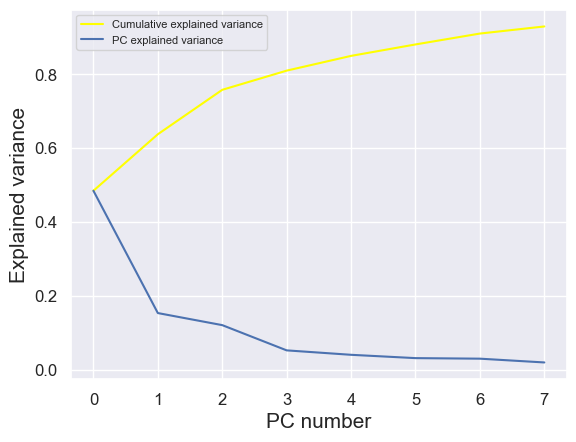

In [75]:
plt.plot(exp_variance_df2.iloc[:,0], exp_variance_df2.iloc[:,1], c="yellow", label="Cumulative explained variance")
plt.plot(pca2.explained_variance_ratio_, label="PC explained variance")
plt.legend(loc="best", fontsize=8)
plt.xlabel('PC number', fontsize=15)
plt.ylabel('Explained variance', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

__Note__

Applying PCA to your data set results in the loss of data trends (explained variance). If interpretability of the results is important for your analysis, PCA may not be the right technique for dimensionality reduction.